# IE48B HW#2 
## Muhammed Burak Gür 2016403198

##### Note: Graph representations are provided at the end of the file as appendixes. 

In [5]:
library(ggplot2)
library(data.table)
library(caret)
library(rpart)
library(genlasso)
library(dplyr)
library(Metrics)

# Data Preperation

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.86589548,-0.9363963,-0.8172700,-0.2636122,-1.25804830,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.24516910
1,-0.8969721,-0.6856855,-1.35138180,-1.45866680,-1.1653456,-1.4039293,-1.8217996,-0.83160109,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.39252410
1,-0.4646960,-0.5677389,-0.03202276,-0.63504562,-0.6028255,-0.2668563,-0.2670613,-0.93104230,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.88760835
3,-0.1871897,-0.6208077,-0.81566070,-0.52139796,-0.7904229,-0.9675174,-1.4870063,-0.27788714,-0.8350747,...,-0.9086154,-0.7262865,0.1837776,-0.7374441,-1.1139967,-0.3939866,-0.5878895,-0.6082319,-0.6364646,-0.34902865
2,-1.1360166,-1.3191953,-1.84462380,-0.78869178,-0.2517154,-1.4876032,-0.6687641,-0.34036037,-1.0463815,...,-1.1829110,-1.0735136,-1.6113624,-1.0643404,-0.9707364,-0.8272809,-0.9535377,-1.2701854,-1.7427579,-0.92594391
2,-0.5687087,-0.8881180,-0.04797658,-0.03803611,-0.4830683,-1.0946887,-0.9534529,-0.03000688,-0.7954546,...,-0.9907398,0.5183746,-0.2285628,-0.5652887,-0.6429980,-1.1094278,-0.1010932,-0.2339490,-0.6198269,-0.08306189


class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.8658955,-0.9363963,-0.8172700,-0.2636122,-1.2580483,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.2451691
1,-0.8969721,-0.6856855,-1.35138180,-1.4586668,-1.1653456,-1.4039293,-1.8217996,-0.8316011,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.3925241
1,-0.4646960,-0.5677389,-0.03202276,-0.6350456,-0.6028255,-0.2668563,-0.2670613,-0.9310423,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.8876084
1,-0.9658386,-1.6445832,-1.80593540,-1.4996576,-0.9200879,-1.1157058,-0.6501953,-0.9187663,-1.2347080,...,-1.0725346,-1.0630339,-1.3165634,-0.7357389,-1.0521517,-0.9604649,-1.1335659,-0.6103437,-1.1652195,-0.6858989
1,-1.1864222,-0.8931970,-0.97773692,-0.6341093,-1.3848198,-1.2719261,-1.2121711,-1.4527917,-0.9344170,...,-0.8568934,-1.2176250,-0.8236537,-1.2804516,-1.5893960,-0.9982938,-0.8107998,-0.9815906,-1.2784443,-1.1078289
1,-1.9453272,-1.4498402,-1.48894560,-1.8004841,-2.3130602,-1.7720853,-2.1548821,-1.3312254,-2.2651396,...,0.3899754,-0.1803694,0.5541209,0.6861262,0.6906180,0.6207642,0.9260082,-1.9410525,-2.1112366,-1.7680882


id,class,time,value
1,1,1,-0.4642765
1,1,2,-0.5550479
1,1,3,-0.8428431
1,1,4,-0.8658955
1,1,5,-0.9363963
1,1,6,-0.8172700


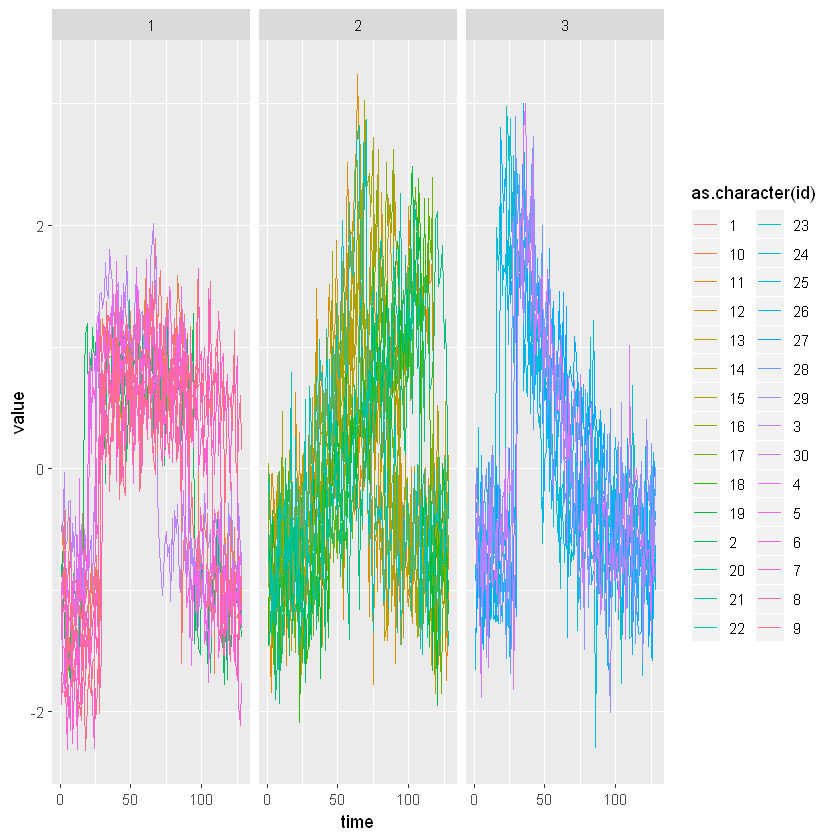

In [6]:
directory <- getwd()

dataset <- 'CBF_TRAIN.txt'

train_data_path <- sprintf('CBF_TRAIN.txt',directory,dataset,dataset)

train_data <- fread(train_data_path)

head(train_data)

setnames(train_data,'V1','class')

train_data <- train_data[order(class)]

head(train_data)

train_data[,class:=as.character(class)]
train_data[,id:=1:.N]
long_train=melt(train_data,id.vars=c('id','class'))

long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

head(long_train)

ggplot(long_train, aes(time,value)) + geom_line(aes(color=as.character(id))) +
  facet_wrap(~class)

# Fused Lasso

In [7]:
lasso_results <- vector("list",30)

for(i in 1:30){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
    print(paste0(i,'.Time Series' ))
    print(paste0('minimum crossvalidated error:',cv$lambda.min))
    print(paste0('1se error:',cv$lambda.min))
  lasso_results[[i]] <- predict.genlasso(flasso, cv$lambda.min)
  
}



Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "1.Time Series"
[1] "minimum crossvalidated error:0.5087665975"
[1] "1se error:0.5087665975"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "2.Time Series"
[1] "minimum crossvalidated error:1.54482427000001"
[1] "1se error:1.54482427000001"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "3.Time Series"
[1] "minimum crossvalidated error:0.673140352142856"
[1] "1se error:0.673140352142856"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "4.Time Series"
[1] "minimum crossvalidated error:1.22983253178571"
[1] "1se error:1.22983253178571"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "5.Time Series"
[1] "minimum crossvalidated error:0.155083875"
[1] "1se error:0.155083875"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "6.Time Series"
[1] "minimum crossvalidated error:1.2025240679"
[1] "1se error:1.2025240679"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1

In [8]:
lasso_dt = vector('list', 30)
for(i in seq(1:30)){
lasso_dt[[i]] =as.data.table(t(lasso_results[[i]]$fit))
}

In [9]:
lasso_best_fit_dt = rbindlist(lasso_dt)
lasso_best_fit_dt

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.9745224,-0.9745224,-0.9745224,...,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423
-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,...,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790
-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.6247595,-0.6247595,-0.6247595,...,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623
-1.1715456,-1.1715456,-1.1715456,-1.1715456,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,...,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410
-1.0313383,-0.9384036,-0.9384036,-0.9384036,-1.2528852,-1.2528852,-1.2528852,-1.2528852,-1.1027905,-1.1027905,...,-1.0123148,-1.0206394,-1.0206394,-1.2798399,-1.2798399,-1.0336173,-1.0336173,-1.0336173,-1.1155947,-1.1155947
-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,...,0.4218434,0.4218434,0.4218434,0.4218434,0.4218434,0.4218434,0.4218434,-1.5392844,-1.5392844,-1.5392844
-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,...,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402
-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,...,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138
-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,...,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404
-0.8339068,-0.8339068,-0.8339068,-0.9969026,-1.3770887,-1.3770887,-1.3770887,-1.3770887,-1.2837008,-1.2837008,...,-0.8390135,-0.8390135,-0.7049536,-0.8682420,-0.8682420,-1.1080688,-1.1080688,-1.1080688,-1.1080688,-1.1080688


# Regression Tree

In [10]:
ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)

tree_depths <- vector('list',10)

predictions<- vector('list',30)

In [12]:
for(j in 1:30){
  
  
  selected_dt <- long_train[id == j]
  
  
  for(i in 1:10){
    
    fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   metric = 'RMSE',
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = i),
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    tree_depths[[i]] <- fit_tree$results
    
}
  
  depth_results = rbindlist(tree_depths)
  depth_results[, max_depth:=seq(1,10)]
  
  
  
  print(paste0(j, '.Time series depth analysis by looking RMSE values'))
  print(depth_results)
  best_depth <- which.min(depth_results$RMSE)
  print(paste0('Best depth for this time series:', best_depth))
  
  best_model_fit <-train(value~time, 
                         data= selected_dt,
                         method = "rpart",
                         metric = 'RMSE',
                         control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = best_depth),
                         trControl = ctrl1,
                         tuneGrid = expand.grid(cp = 0), 
  )
  
  

  
  
  
  predicted_dt <-selected_dt[,best_tree_fit_results:=predict(best_model_fit,selected_dt)]
  
  predictions[[j]] <- predict(best_model_fit,selected_dt)
  #data_plot=melt(predicted_dt,id.vars='time',measure.vars=c('value','best_tree_fit_results'))
  
  #print(ggplot(data_plot,aes(x=time,y=value,color=variable))+geom_line())
  
}

[1] "1.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.8120349 0.3641774 0.6713380 0.1400659  0.2123324 0.12757507         1
 2:  0 0.4019593 0.8283506 0.2757120 0.1734652  0.1457241 0.08178812         2
 3:  0 0.3919322 0.8389694 0.2756055 0.1624198  0.1339622 0.08459204         3
 4:  0 0.3951249 0.8389209 0.2829074 0.1687424  0.1424364 0.07943432         4
 5:  0 0.3758524 0.8513193 0.2772127 0.1616354  0.1420850 0.07761032         5
 6:  0 0.3805203 0.8499412 0.2769905 0.1671696  0.1382811 0.08019841         6
 7:  0 0.3977683 0.8340334 0.2837136 0.1808004  0.1519955 0.08164707         7
 8:  0 0.3565200 0.8702080 0.2695515 0.1373597  0.1052893 0.07662648         8
 9:  0 0.3794520 0.8473758 0.2802465 0.1616519  0.1350896 0.08675174         9
10:  0 0.3744002 0.8518164 0.2759669 0.1652955  0.1396187 0.08670113        10
[1] "Best depth for this time series:8"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "2.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.7056784 0.5200603 0.5171169 0.1645330  0.1982842 0.11437302         1
 2:  0 0.4226041 0.8167949 0.3118689 0.1843511  0.1545911 0.09133733         2
 3:  0 0.4277332 0.8128532 0.3117931 0.1807617  0.1639225 0.09255386         3
 4:  0 0.4331105 0.8108973 0.3220981 0.1670184  0.1494892 0.07867687         4
 5:  0 0.4194665 0.8201482 0.3120894 0.1643730  0.1480105 0.07730445         5
 6:  0 0.4250739 0.8171067 0.3165371 0.1656507  0.1470870 0.08217685         6
 7:  0 0.4284828 0.8112433 0.3186762 0.1729292  0.1528366 0.08395622         7
 8:  0 0.4073303 0.8343834 0.3111134 0.1568485  0.1310893 0.08470845         8
 9:  0 0.4182483 0.8267747 0.3149619 0.1578033  0.1351215 0.08181507         9
10:  0 0.4038568 0.8354870 0.3070396 0.1497481  0.1334185 0.07300011        10
[1] "Best depth for this time series:10"
[1] "3.Time series depth analysi

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "6.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.5378673 0.7080569 0.3929047 0.2366240  0.2333165 0.12504760         1
 2:  0 0.5570392 0.6832014 0.4172123 0.1802062  0.1837795 0.09974086         2
 3:  0 0.5446774 0.6967685 0.4134355 0.1795521  0.1779772 0.11001496         3
 4:  0 0.5522961 0.6878884 0.4137948 0.1931184  0.2100668 0.11260629         4
 5:  0 0.5631876 0.6882806 0.4238772 0.1897482  0.1721692 0.11015328         5
 6:  0 0.5748726 0.6575721 0.4312868 0.1579969  0.1878672 0.08837216         6
 7:  0 0.5593200 0.6735723 0.4201131 0.1761878  0.2020092 0.11211593         7
 8:  0 0.5509803 0.6881969 0.4190134 0.1654433  0.1725063 0.09978953         8
 9:  0 0.5696643 0.6711004 0.4278496 0.1672132  0.1781958 0.09447815         9
10:  0 0.5678430 0.6727957 0.4242843 0.1904258  0.1890632 0.12135555        10
[1] "Best depth for this time series:1"
[1] "7.Time series depth analysis

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "8.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.7581131 0.4423168 0.5844168 0.1546979  0.2010070 0.13545372         1
 2:  0 0.3908490 0.8466085 0.2896748 0.1300772  0.1075764 0.06827827         2
 3:  0 0.3845738 0.8506449 0.2882146 0.1271599  0.1006610 0.06555217         3
 4:  0 0.3820234 0.8497246 0.2861925 0.1418285  0.1140637 0.08752296         4
 5:  0 0.3925993 0.8412288 0.2901115 0.1351177  0.1257455 0.07814890         5
 6:  0 0.3924389 0.8420205 0.2874762 0.1403471  0.1124314 0.08095733         6
 7:  0 0.3954790 0.8401795 0.2911577 0.1350520  0.1148163 0.07559483         7
 8:  0 0.3918320 0.8450473 0.2890747 0.1342873  0.1157265 0.06960560         8
 9:  0 0.3792872 0.8534514 0.2864628 0.1411743  0.1141350 0.08557221         9
10:  0 0.3875534 0.8455550 0.2910422 0.1408379  0.1244960 0.08025385        10
[1] "Best depth for this time series:9"
[1] "9.Time series depth analysis

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "10.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.8321614 0.3160332 0.6913772 0.1116649  0.1654416 0.10394136         1
 2:  0 0.3835926 0.8446218 0.2792760 0.1776201  0.1450156 0.08782251         2
 3:  0 0.3972700 0.8313430 0.2906220 0.1804814  0.1547580 0.09589581         3
 4:  0 0.3931266 0.8331244 0.2895370 0.2038566  0.1717710 0.10637224         4
 5:  0 0.4115351 0.8228237 0.2964002 0.1793901  0.1506082 0.08840499         5
 6:  0 0.4071553 0.8248237 0.2978875 0.1847866  0.1688690 0.09075233         6
 7:  0 0.3945657 0.8331431 0.2914041 0.1871409  0.1659678 0.09030105         7
 8:  0 0.4112528 0.8198916 0.2995229 0.1821937  0.1525503 0.08794418         8
 9:  0 0.4166240 0.8214311 0.2994869 0.1788212  0.1464330 0.08094378         9
10:  0 0.3953827 0.8345869 0.2881621 0.1694051  0.1479286 0.07893690        10
[1] "Best depth for this time series:2"
[1] "11.Time series depth analys

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "13.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.9587700 0.1071096 0.8143445 0.1055726 0.07170795 0.09801224         1
 2:  0 0.5933134 0.6707993 0.4592693 0.1435218 0.14964431 0.10020804         2
 3:  0 0.5440491 0.7280303 0.4193575 0.1487974 0.15559320 0.09934109         3
 4:  0 0.4938003 0.7635670 0.3870875 0.1573968 0.14431839 0.10090695         4
 5:  0 0.4961981 0.7640781 0.3814557 0.1373169 0.14070829 0.07421938         5
 6:  0 0.4752802 0.7866149 0.3764375 0.1370074 0.13014862 0.09623255         6
 7:  0 0.4880577 0.7772510 0.3822095 0.1410560 0.12699524 0.08009803         7
 8:  0 0.4978011 0.7624974 0.3884312 0.1439505 0.15321524 0.08966882         8
 9:  0 0.4841709 0.7738650 0.3775222 0.1318163 0.13509863 0.08008923         9
10:  0 0.4963559 0.7692031 0.3841008 0.1403570 0.13974606 0.07964705        10
[1] "Best depth for this time series:6"
[1] "14.Time series depth analys

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "16.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.9587203 0.1087114 0.7904591 0.1050793 0.08746839 0.09011414         1
 2:  0 0.6535234 0.5914941 0.5005264 0.1801284 0.21518559 0.11138689         2
 3:  0 0.5281043 0.7233247 0.4108239 0.1802950 0.19695066 0.09625530         3
 4:  0 0.5109375 0.7347337 0.4048975 0.1719350 0.17624210 0.09899280         4
 5:  0 0.5066299 0.7543079 0.3940675 0.1621590 0.15042145 0.08912326         5
 6:  0 0.5057021 0.7492897 0.3948361 0.1714163 0.17198460 0.10202576         6
 7:  0 0.5163499 0.7359734 0.3949996 0.1812770 0.17593390 0.09306940         7
 8:  0 0.5211544 0.7405597 0.4005365 0.2093882 0.18368404 0.12877016         8
 9:  0 0.5207857 0.7409399 0.3969138 0.1800138 0.17426648 0.09333066         9
10:  0 0.5153250 0.7424787 0.3960405 0.1854147 0.18372361 0.09479405        10
[1] "Best depth for this time series:6"
[1] "17.Time series depth analys

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "25.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.8609623 0.2822136 0.6991773 0.1511685  0.1755059 0.12965385         1
 2:  0 0.6044221 0.6438598 0.4793908 0.1355075  0.1470583 0.09945620         2
 3:  0 0.5534787 0.7137563 0.4233126 0.1642270  0.1656124 0.09678118         3
 4:  0 0.5084836 0.7595036 0.3884589 0.1746652  0.1782868 0.10090257         4
 5:  0 0.5070399 0.7444521 0.3902400 0.1951247  0.1953782 0.11692023         5
 6:  0 0.5032308 0.7600617 0.3843429 0.1668879  0.1603919 0.09562495         6
 7:  0 0.5217966 0.7446959 0.3940652 0.1971957  0.2005600 0.10966587         7
 8:  0 0.5136359 0.7449650 0.3885668 0.1954260  0.1998826 0.11014264         8
 9:  0 0.5050211 0.7568748 0.3857318 0.1560694  0.1522807 0.08037014         9
10:  0 0.5162805 0.7480871 0.3963940 0.1910775  0.1830987 0.11374191        10
[1] "Best depth for this time series:6"
[1] "26.Time series depth analys

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "27.Time series depth analysis by looking RMSE values"
    cp      RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD max_depth
 1:  0 0.9589293 0.1147689 0.8012476 0.08367542 0.08289312 0.09282332         1
 2:  0 0.6019627 0.6538021 0.4837074 0.12606828 0.13315197 0.09614435         2
 3:  0 0.5450797 0.7074027 0.4214949 0.15080724 0.17905110 0.09637407         3
 4:  0 0.4838123 0.7733352 0.3792012 0.14338762 0.15220075 0.07941441         4
 5:  0 0.4952619 0.7648957 0.3827740 0.14771496 0.14685254 0.08390544         5
 6:  0 0.4907461 0.7657044 0.3776559 0.15097812 0.13997515 0.09285689         6
 7:  0 0.5100740 0.7372763 0.3910095 0.16216895 0.18807643 0.09331518         7
 8:  0 0.4868886 0.7746721 0.3792141 0.12530115 0.11515570 0.07377536         8
 9:  0 0.4865730 0.7741388 0.3806821 0.15069671 0.13717259 0.09112690         9
10:  0 0.4972662 0.7575425 0.3824343 0.15856521 0.15051220 0.09022083        10
[1] "Best depth for this time series:4"
[1] "28.Time series d

In [13]:
prediction_list = vector('list', 30)
for(i in seq(1:30)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

In [14]:
prediction_dt = rbindlist(prediction_list)
prediction_dt

1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,...,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189
-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,...,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928
-0.6339440,-0.6339440,-0.6339440,-0.6339440,-0.6339440,-0.6339440,-0.6339440,-0.6339440,-0.6339440,-0.6339440,...,-0.6500975,-0.6500975,-0.6500975,-0.6500975,-0.6500975,-0.6500975,-0.6500975,-0.6500975,-0.6500975,-0.6500975
-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,...,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038
-1.1066016,-1.1066016,-1.1066016,-1.1066016,-1.1066016,-1.1066016,-1.1066016,-1.1066016,-1.1066016,-1.1066016,...,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676
-1.7525867,-1.7525867,-1.7525867,-1.7525867,-1.7525867,-1.7525867,-1.7525867,-1.7525867,-1.7525867,-1.7525867,...,0.4044431,0.4044431,0.4044431,0.4044431,0.4044431,0.4044431,0.4044431,0.4044431,0.4044431,0.4044431
-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,...,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226
-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,...,-1.2408437,-1.2408437,-1.2408437,-1.2408437,-1.2408437,-1.2408437,-1.2408437,-1.2408437,-1.2408437,-1.2408437
-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,...,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084
-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,...,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181


# MSE Error and Box Plot

In [15]:
performance_list <- vector('list',30)

train_data_orj <- train_data[,-1]
train_data_orj <- train_data_orj[,-129]


In [16]:
for(i in 1:30){
  
lasso_perf<- sum(mse(as.numeric(train_data_orj[i]),as.numeric(lasso_best_fit_dt[i]))) 
tree_perf <- sum(mse(as.numeric(train_data_orj[i]),as.numeric(prediction_dt[i])))

performance_list[[i]] <- data.frame(i, lasso_perf, tree_perf)


}

In [17]:
performance_parameters_dt <- rbindlist(performance_list)

long_performance_parameters_dt <- melt(performance_parameters_dt, id.vars = 'i', measure.vars = c('lasso_perf','tree_perf'))




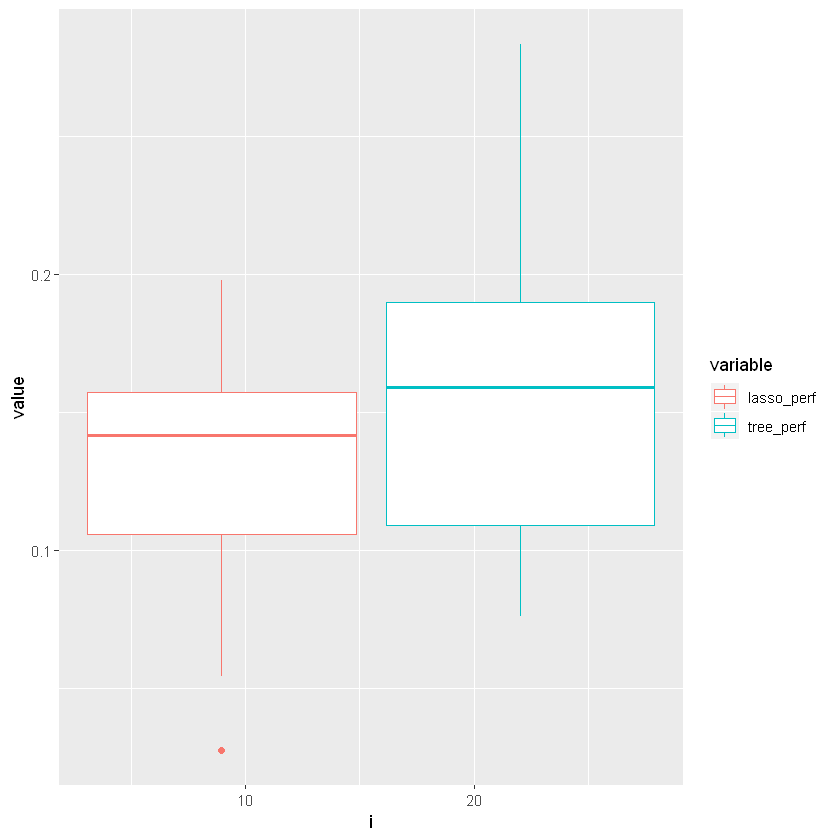

In [18]:
ggplot(long_performance_parameters_dt, aes(x=i, y=value, color = variable))+
geom_boxplot()

We can see from box plot that model with penalty term (fused lasso) has better results than regression trees. Lasso has outliers too but in terms of percentiles, they are close each other rather than tree plot, which means the prediction values are not dispersed, i.e consistent. 

# 1-NN Classifier

In [19]:
trainclass <- as.numeric(unlist(train_data[,1]))

### Lasso

In [20]:
euc_dist_lasso <-as.matrix(dist(lasso_best_fit_dt))

diag(euc_dist_lasso)=1000
neigh_lasso <- apply(euc_dist_lasso,1,order)
predicted_lasso <- trainclass[neigh_lasso[1,]]
table(trainclass,predicted_lasso)

acc_lasso=sum(trainclass==predicted_lasso)/length(predicted_lasso)
print(acc_lasso)


          predicted_lasso
trainclass  1  2  3
         1  8  0  2
         2  1 11  0
         3  1  0  7

[1] 0.8666667


### Tree

In [21]:
euc_dist_tree <-as.matrix(dist(prediction_dt))
diag(euc_dist_tree)=1000
neigh_tree <- apply(euc_dist_tree,1,order)
predicted_tree <- trainclass[neigh_tree[1,]]
table(trainclass,predicted_tree)

acc_tree=sum(trainclass==predicted_tree)/length(predicted_tree)
print(acc_tree)

          predicted_tree
trainclass  1  2  3
         1  8  0  2
         2  0 12  0
         3  1  0  7

[1] 0.9


### Raw Data

In [22]:
euc_dist <- as.matrix(dist(train_data[,2:ncol(train_data)]))
diag(euc_dist)=1000
neigh <- apply(euc_dist,1,order)
predicted_raw <- trainclass[neigh[1,]]
table(trainclass,predicted_raw)

acc_raw=sum(trainclass==predicted_raw)/length(predicted_raw)
print(acc_raw)

          predicted_raw
trainclass  1  2  3
         1 10  0  0
         2  0 11  1
         3  0  0  8

[1] 0.9666667


# Graph Plots

## Fused Lasso Graphs

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


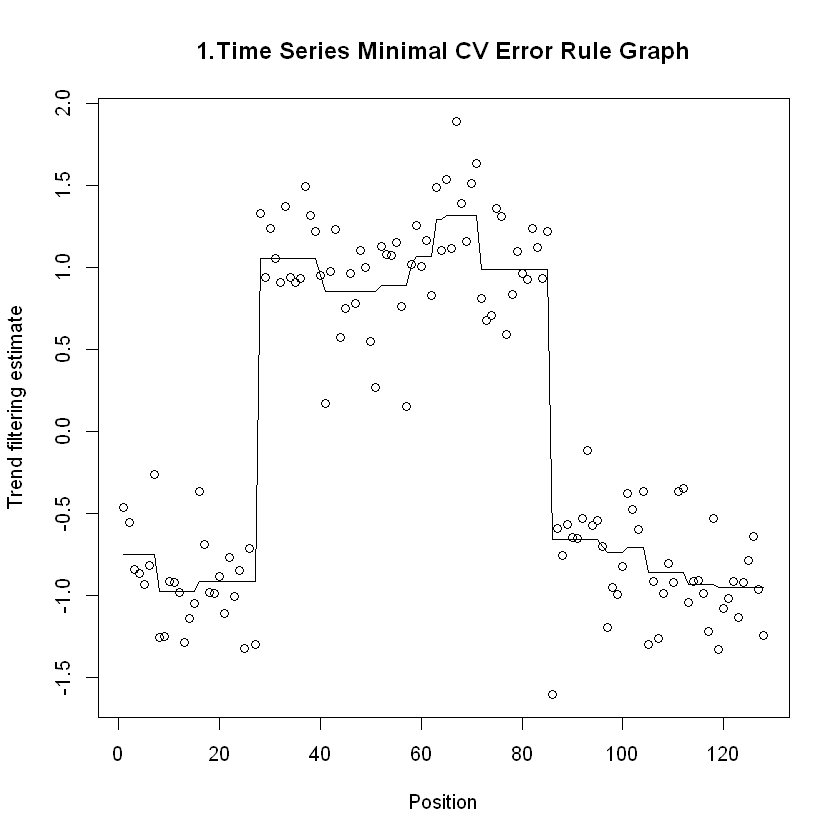

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


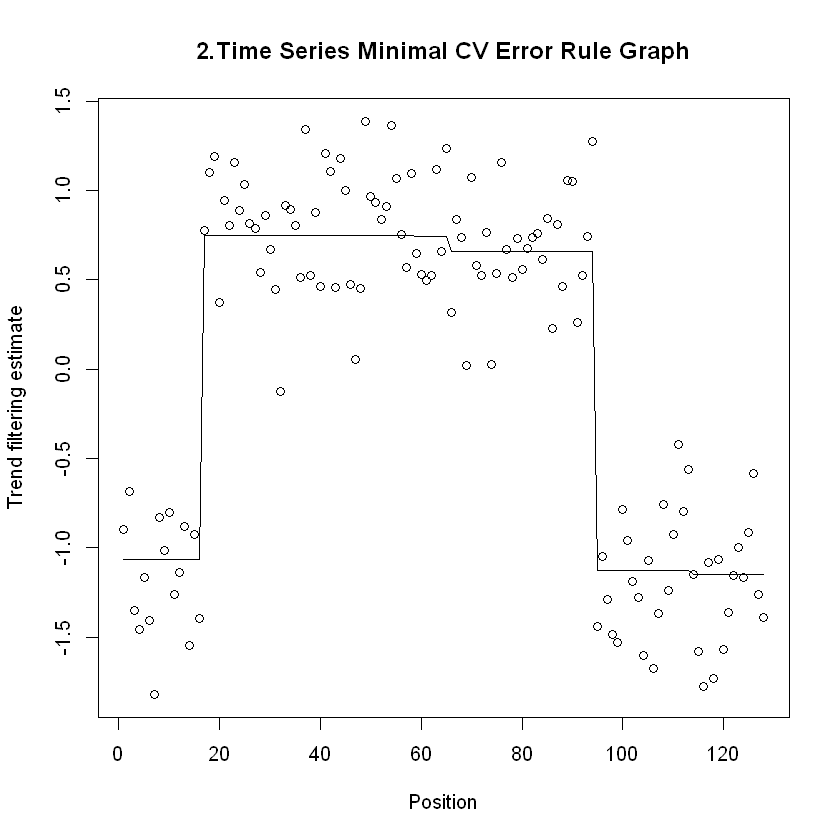

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


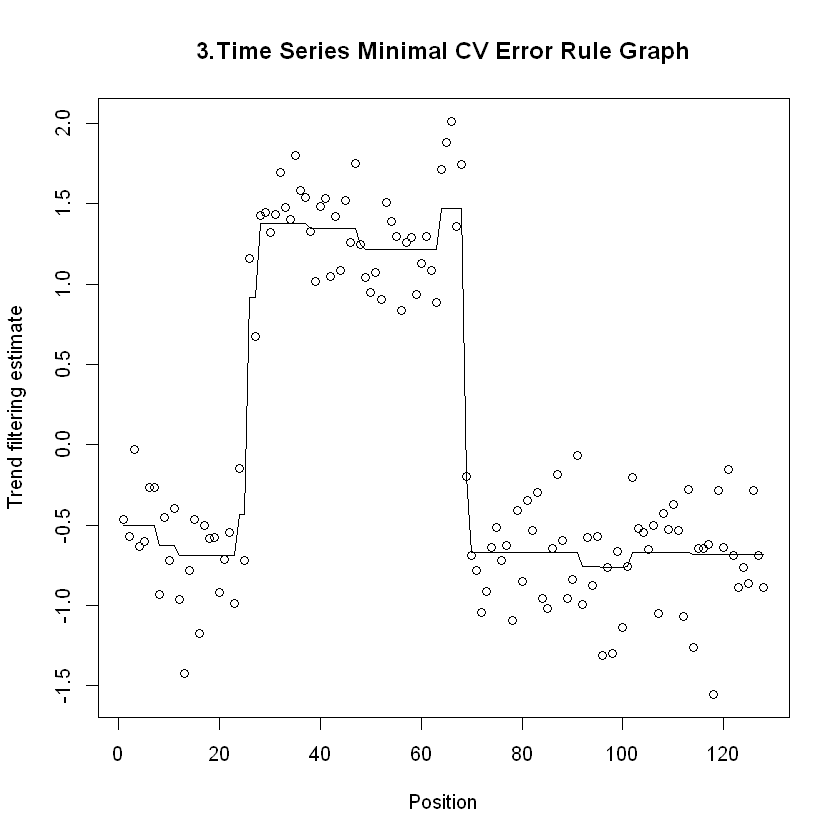

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


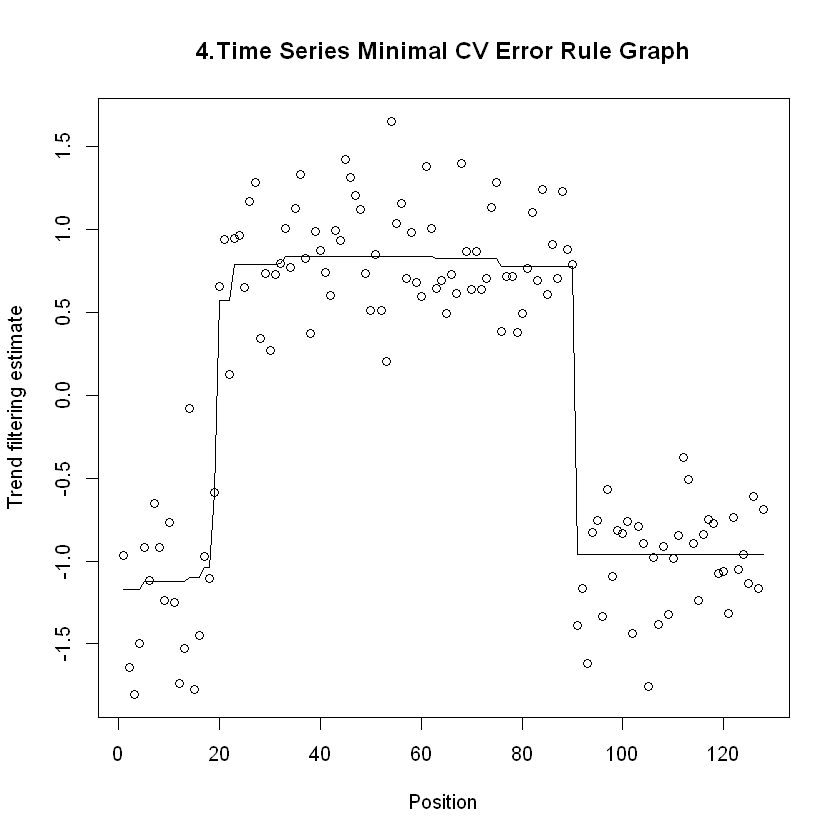

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


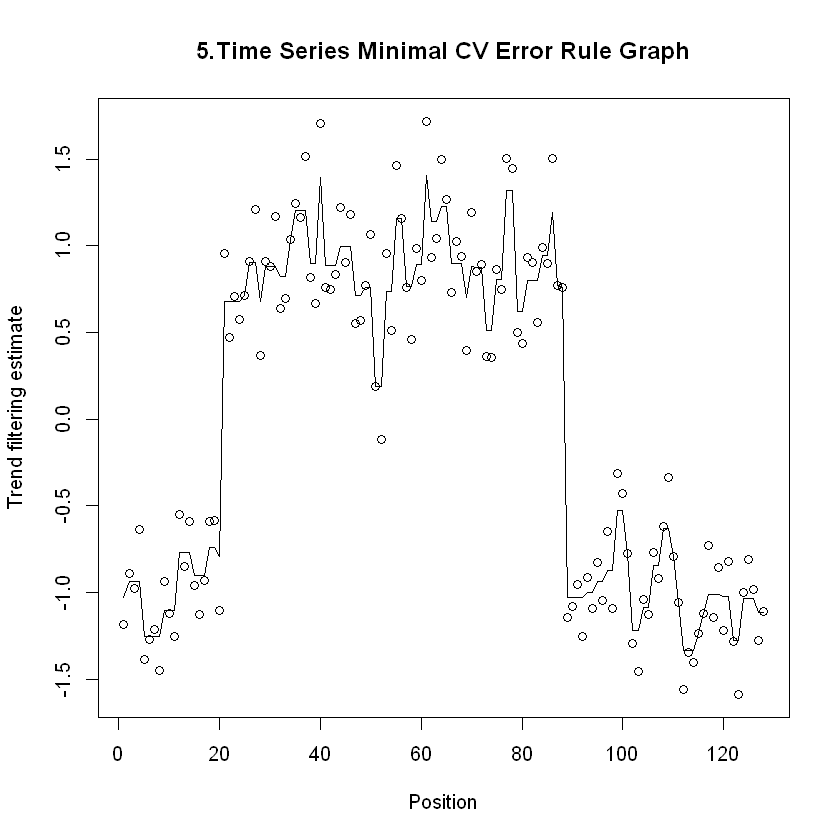

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


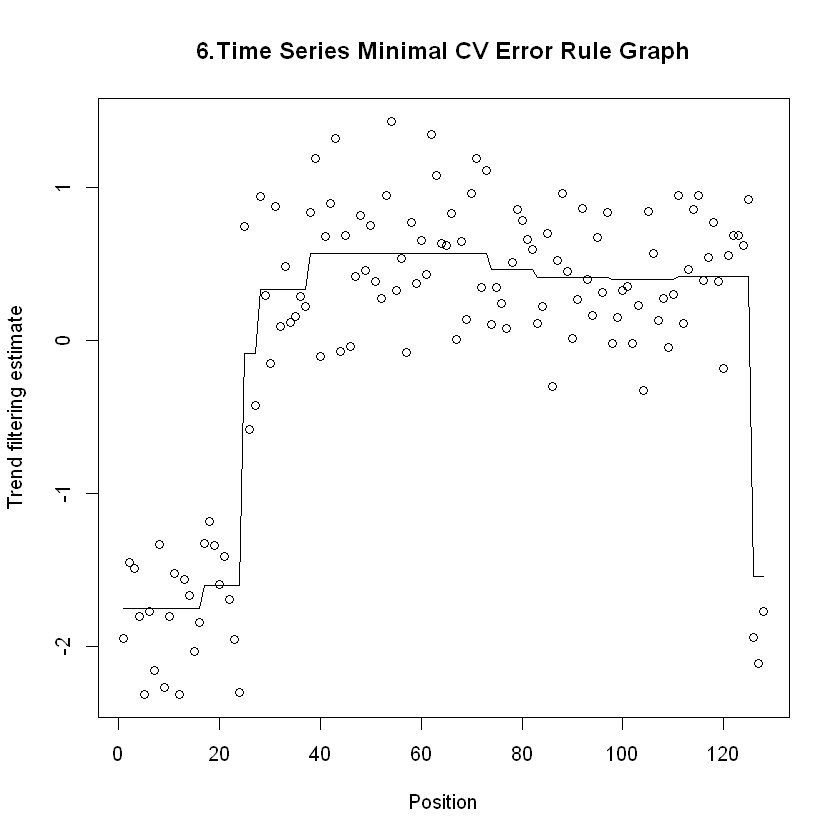

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


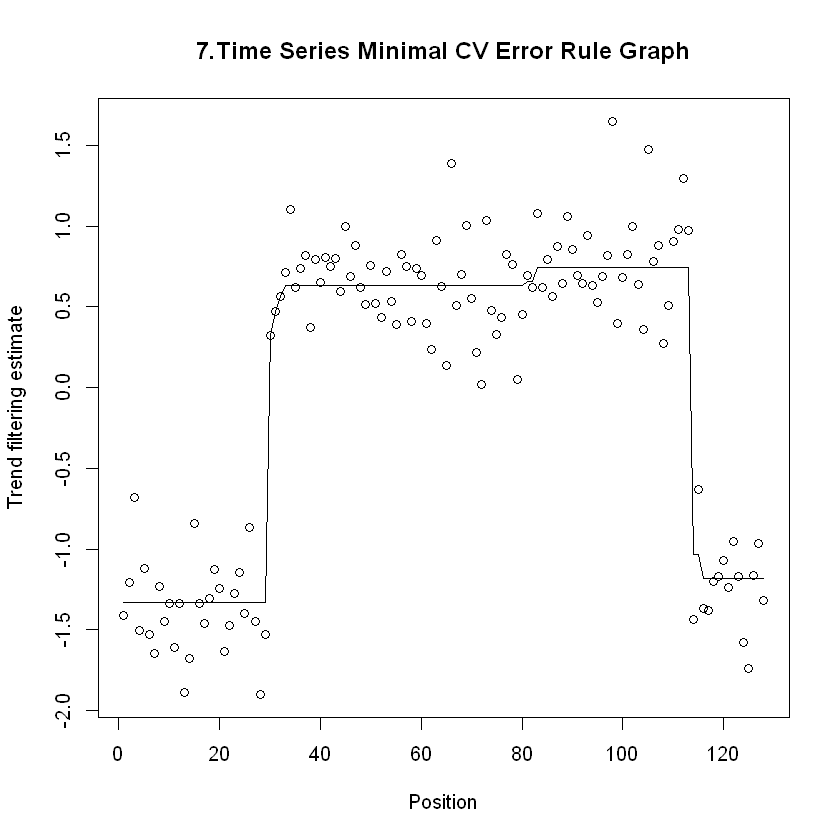

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


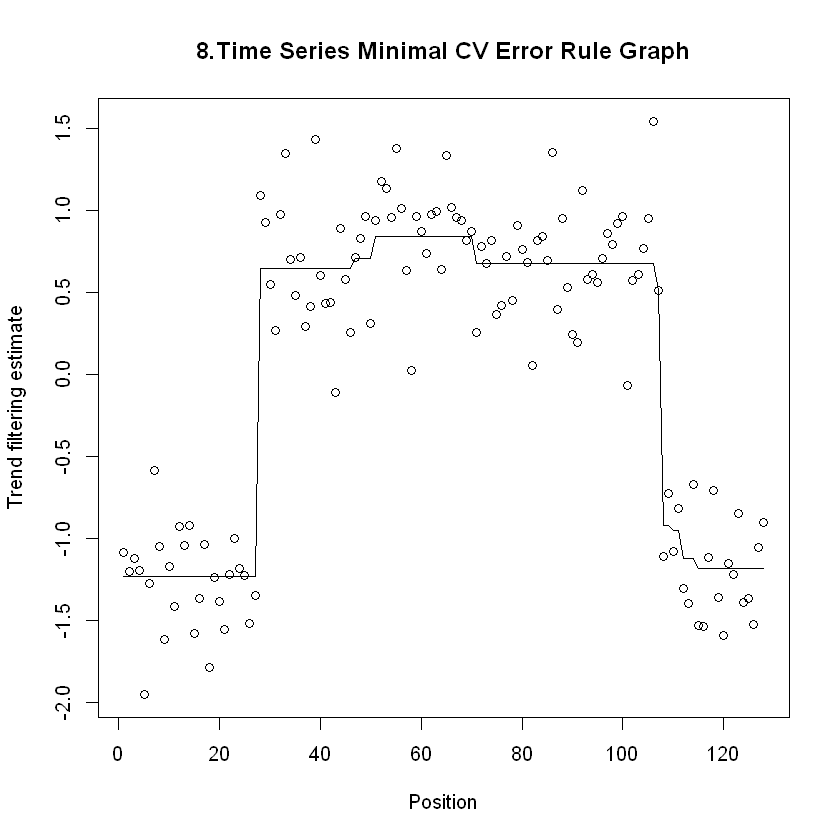

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


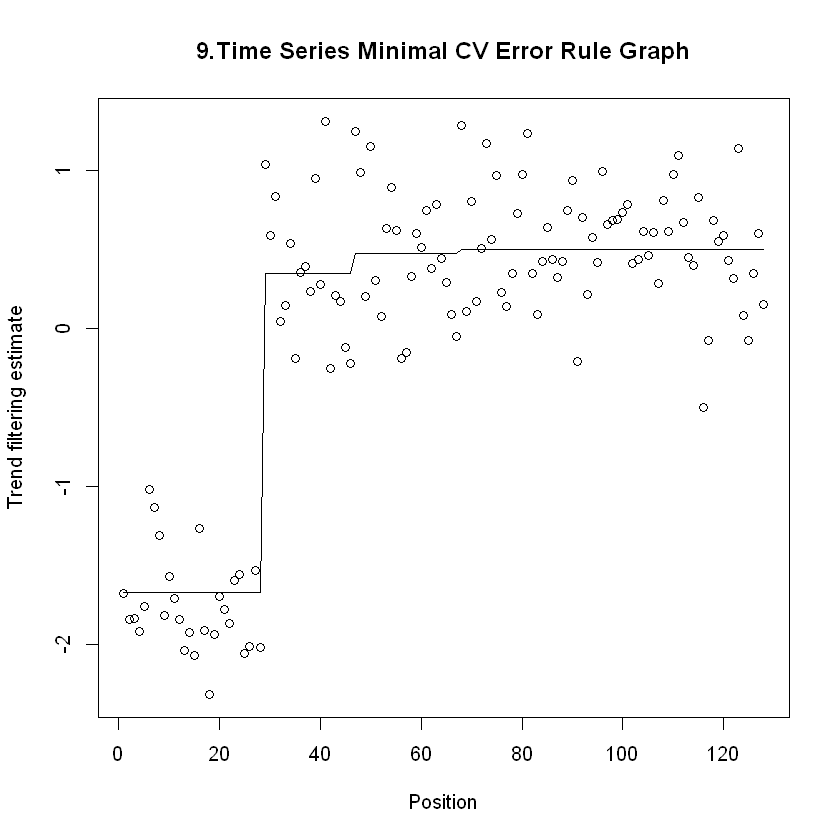

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


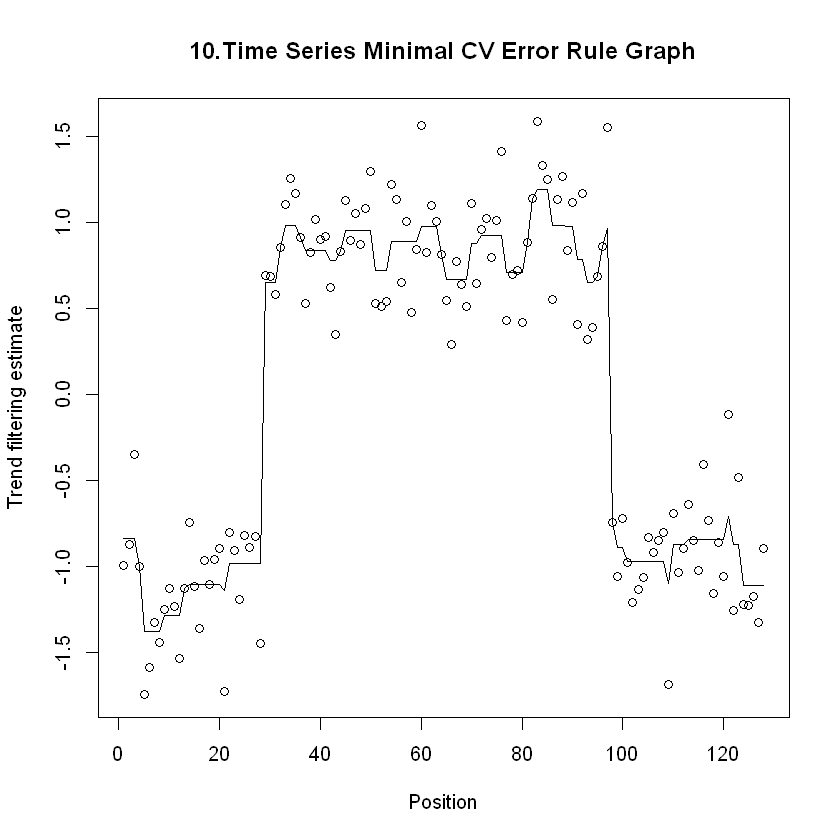

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


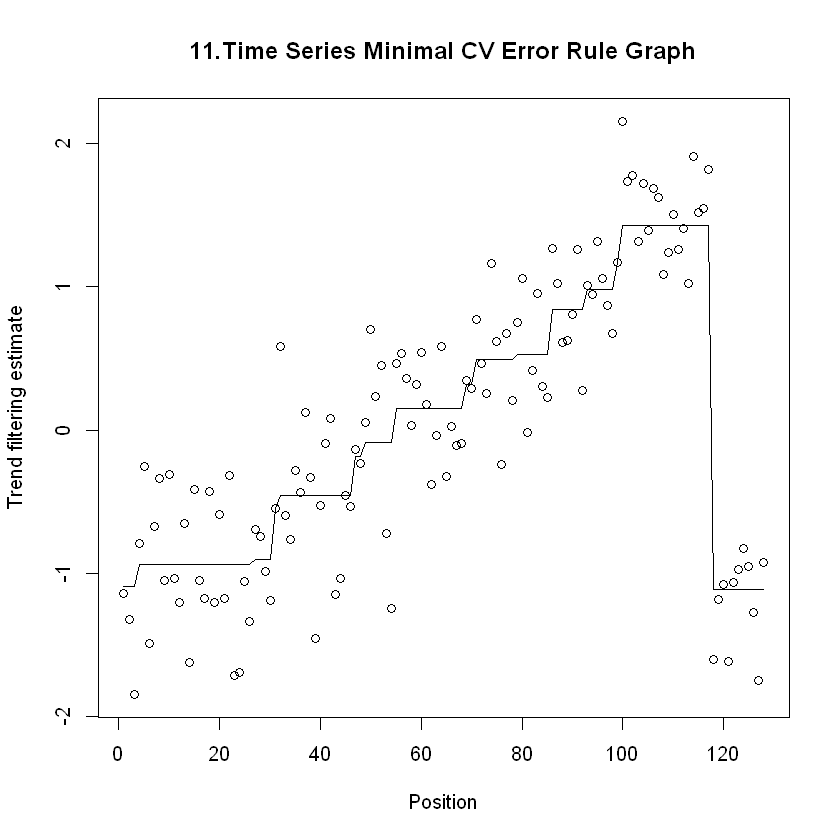

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


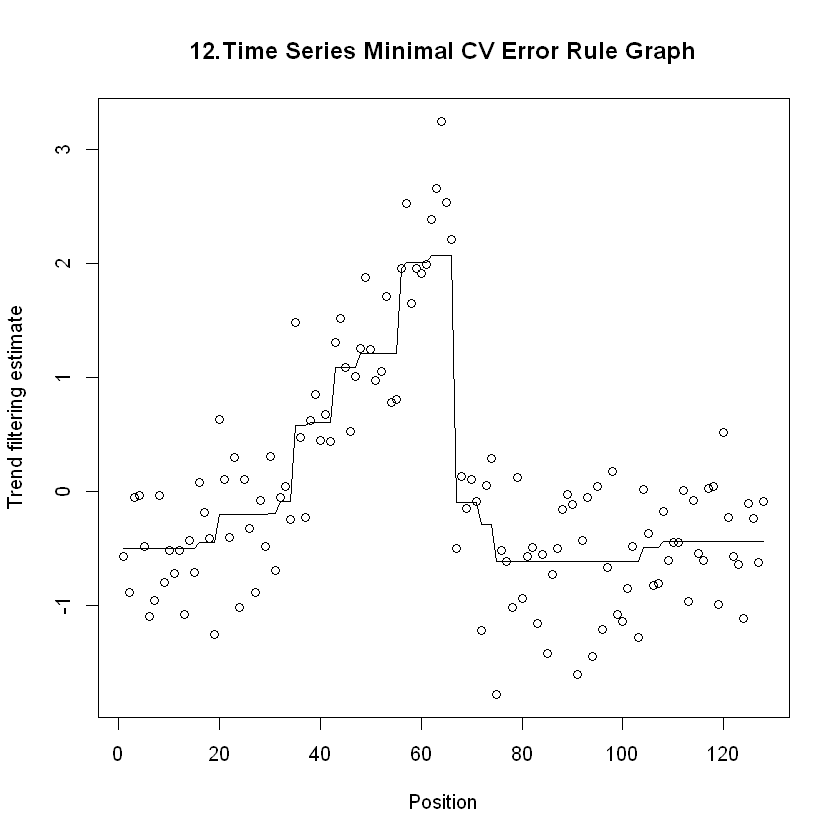

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


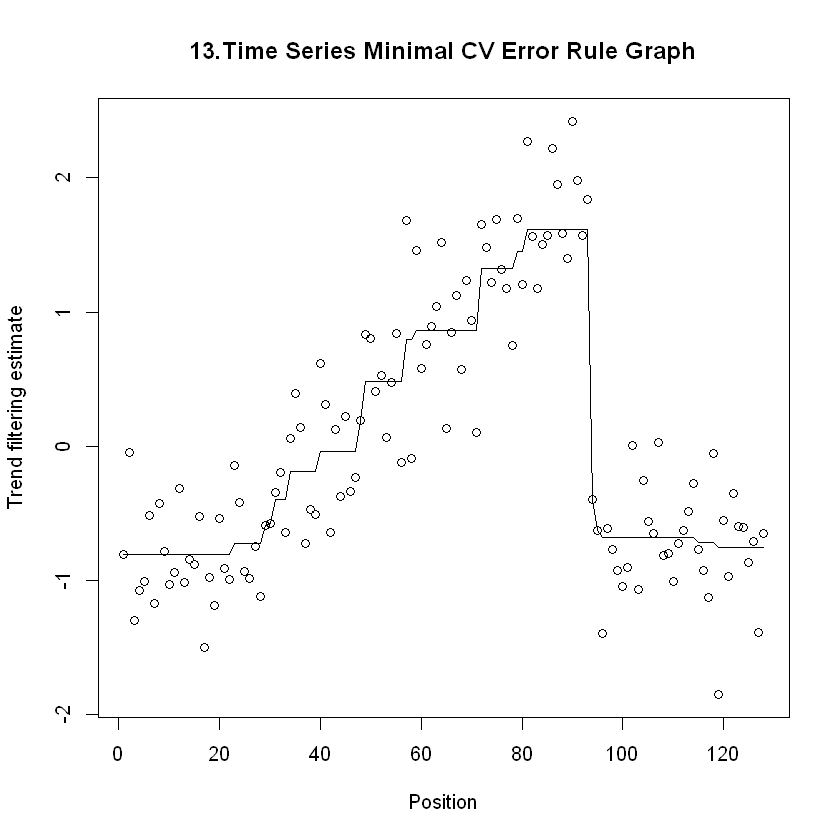

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


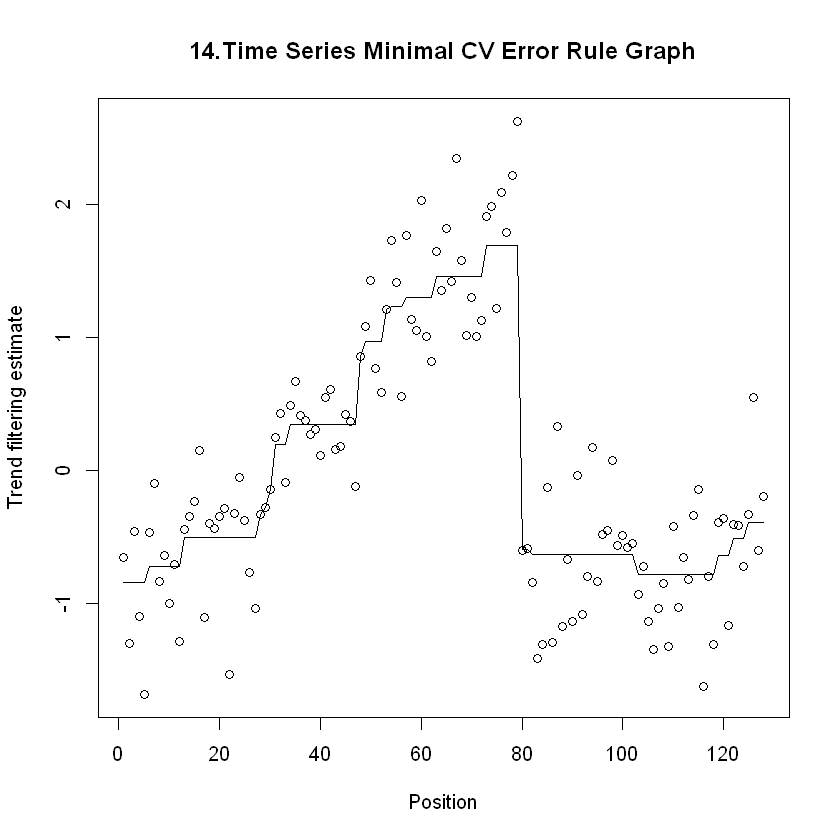

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


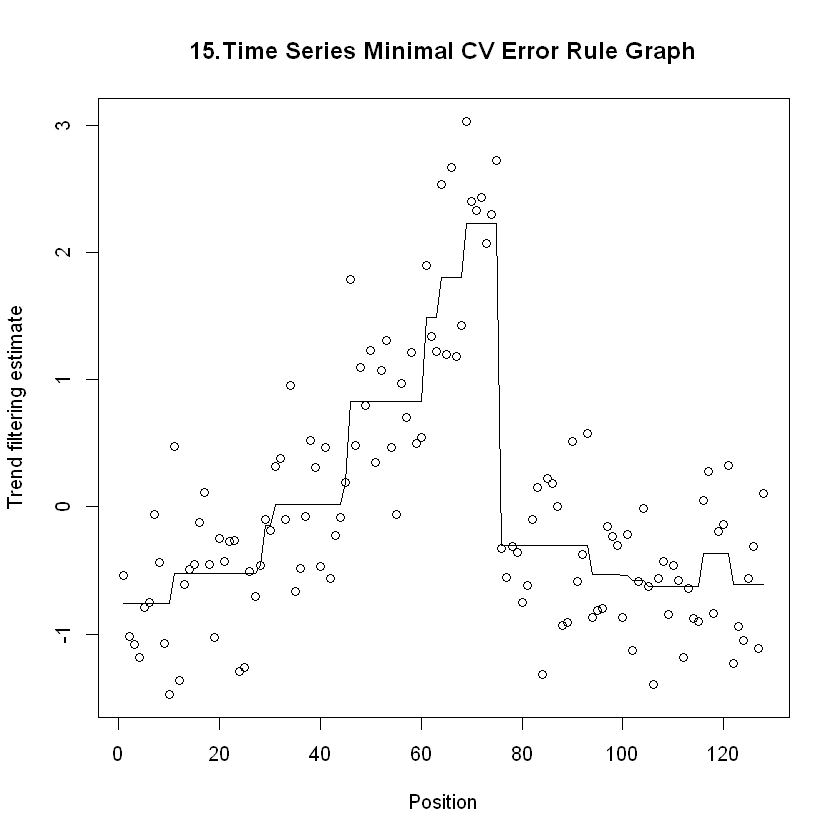

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


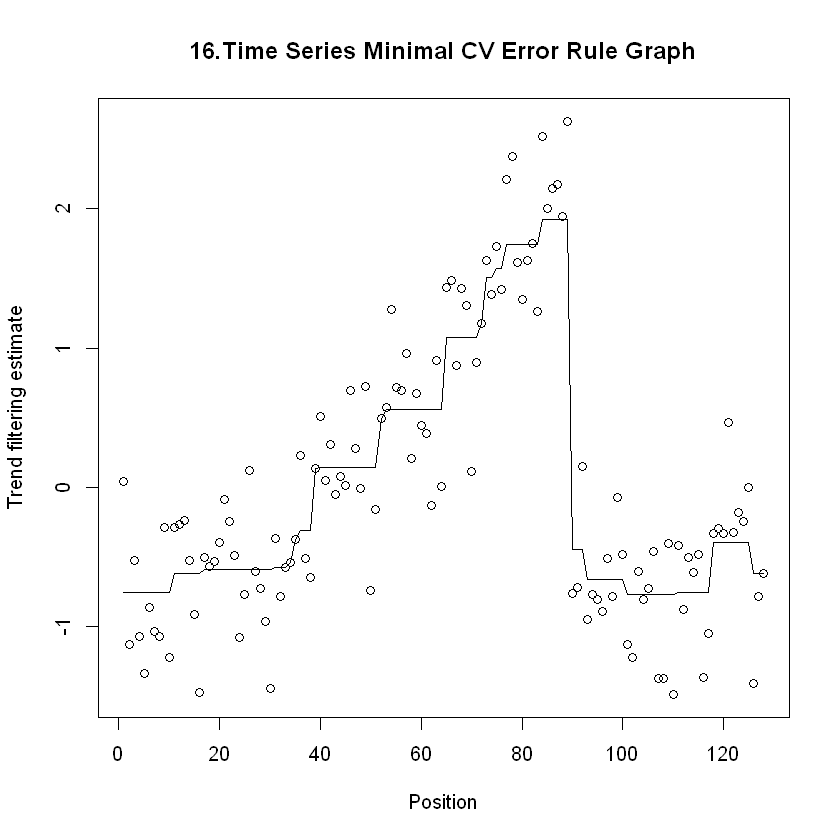

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


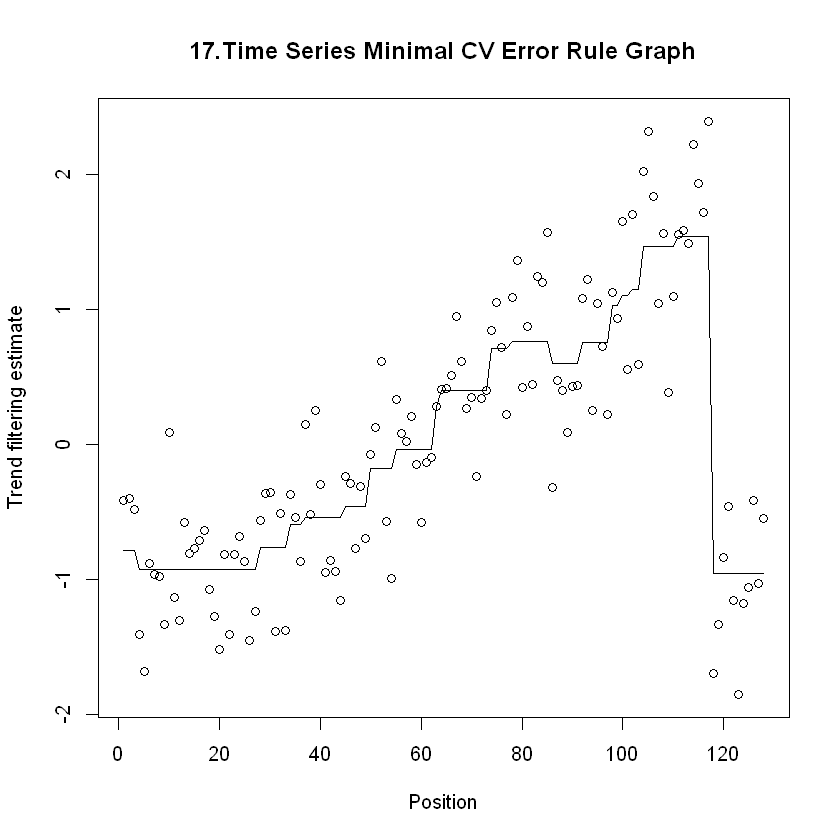

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


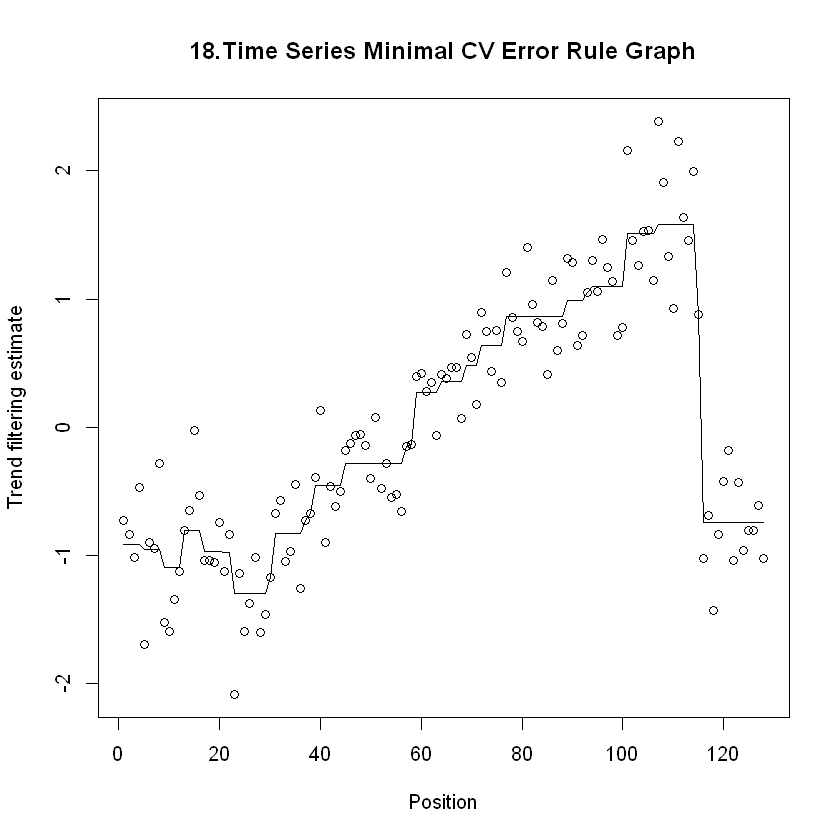

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


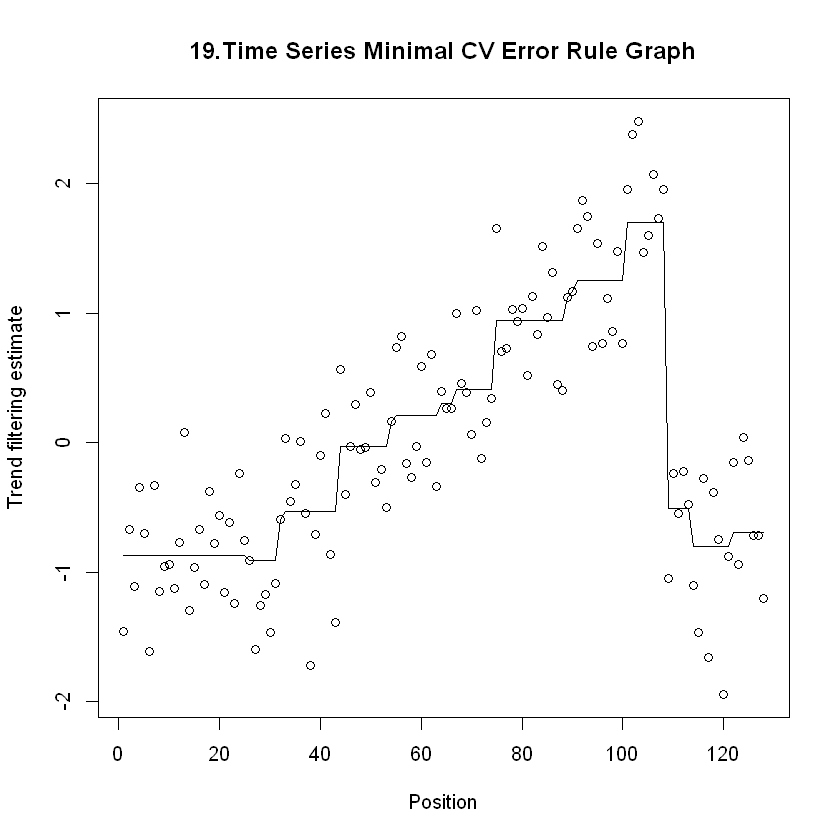

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


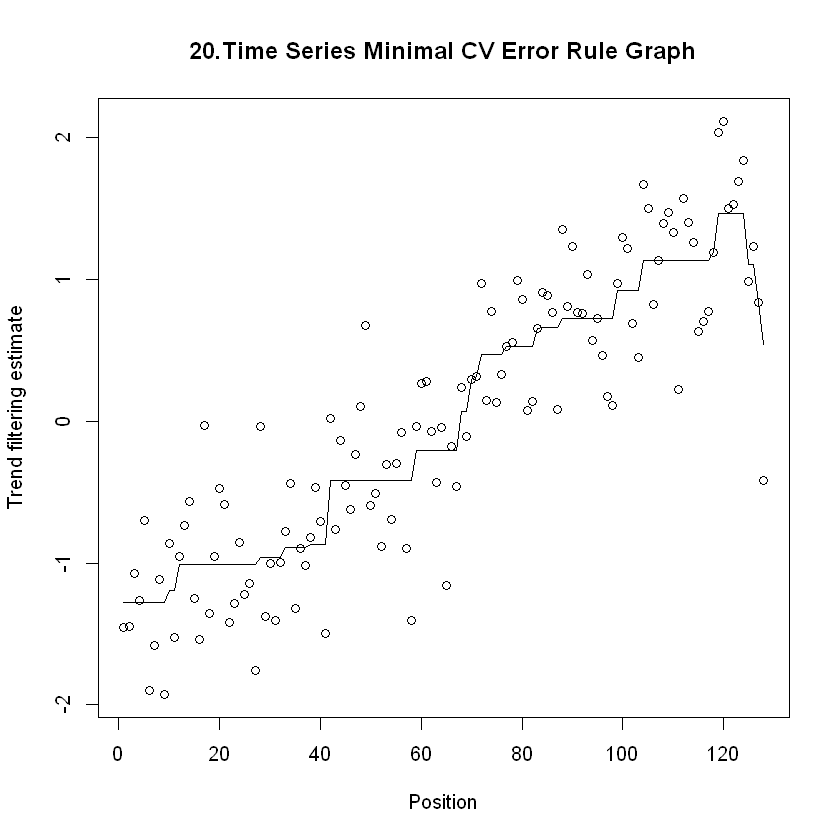

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


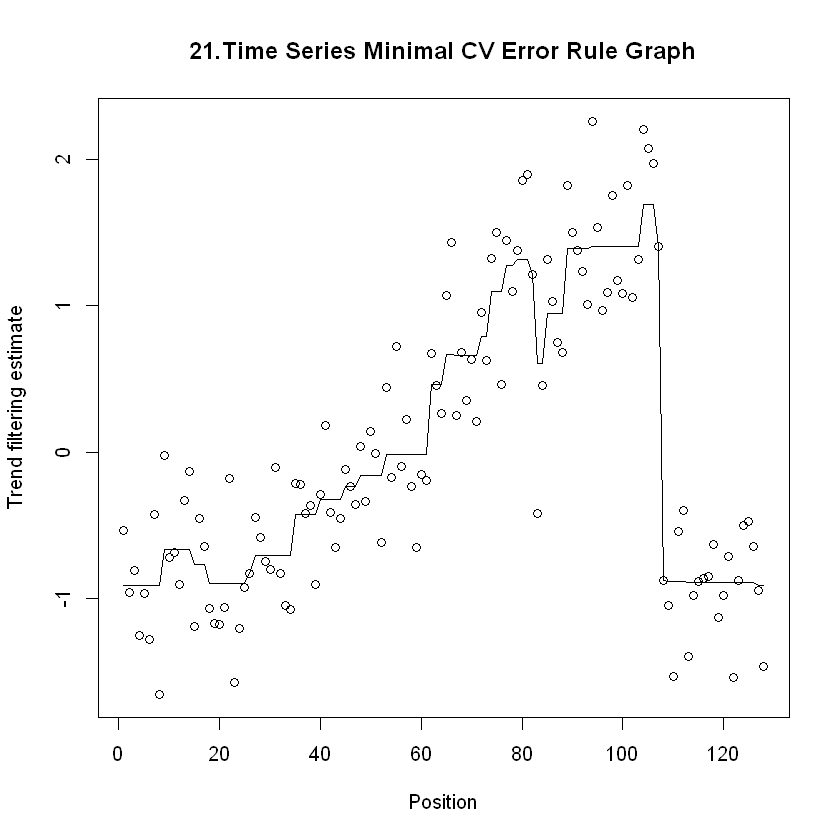

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


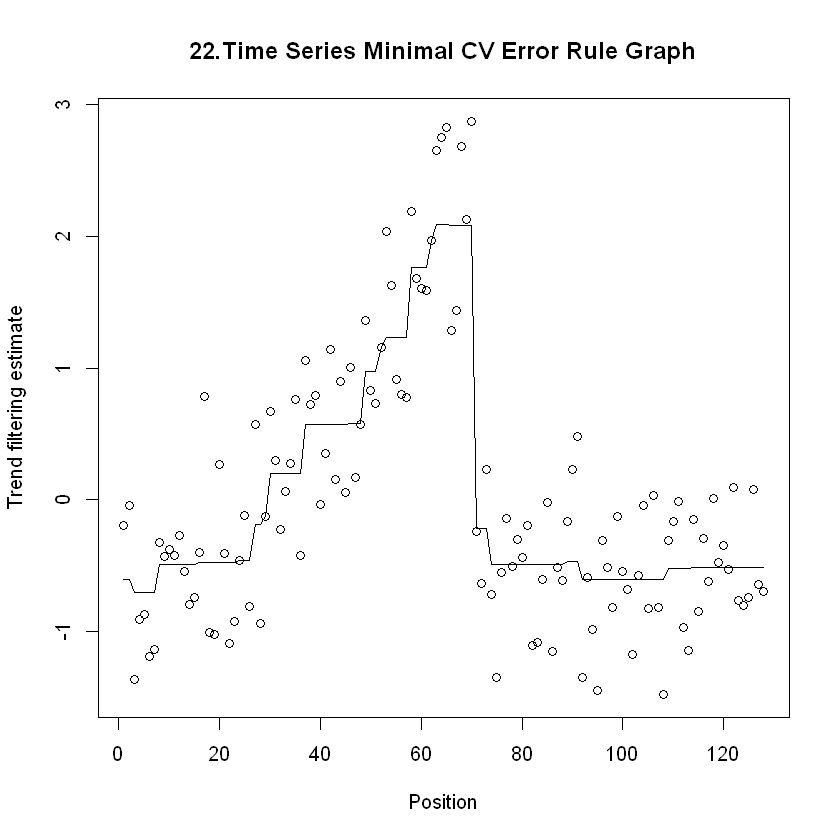

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


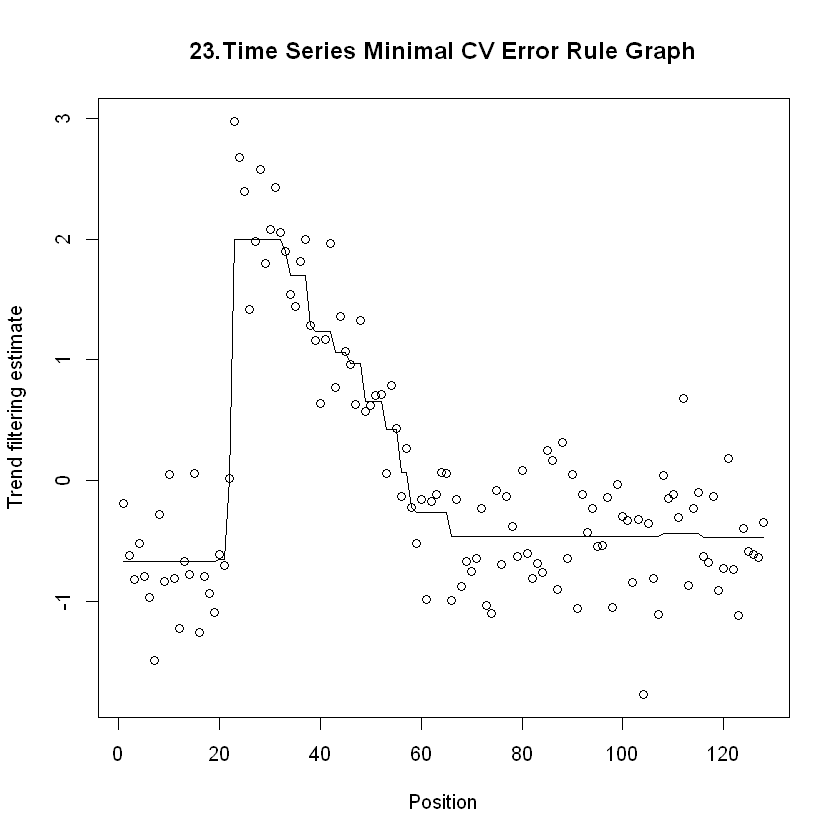

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


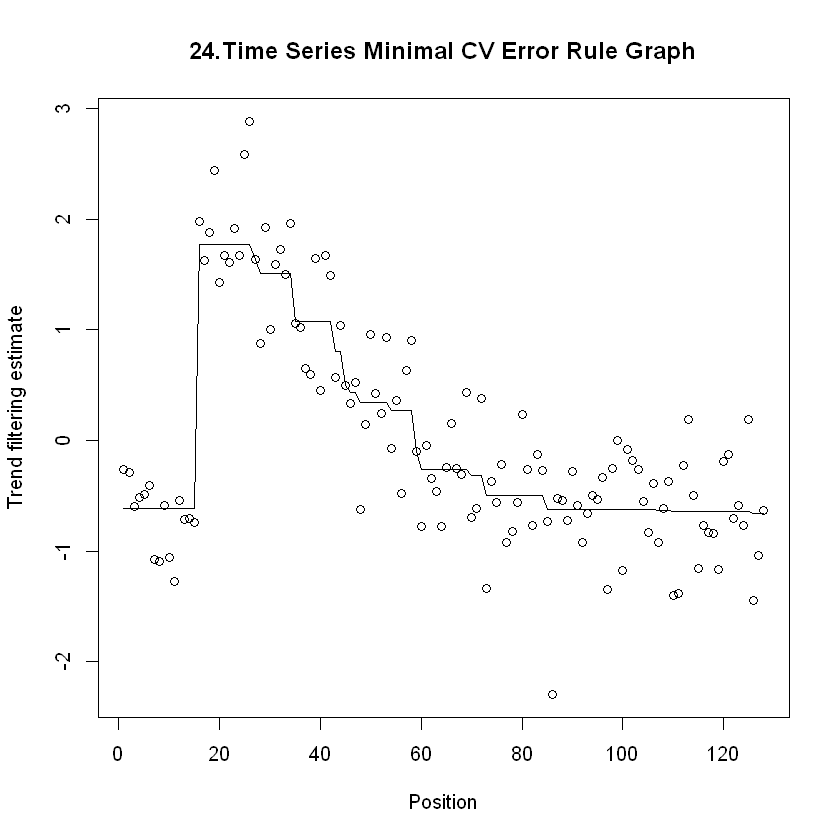

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


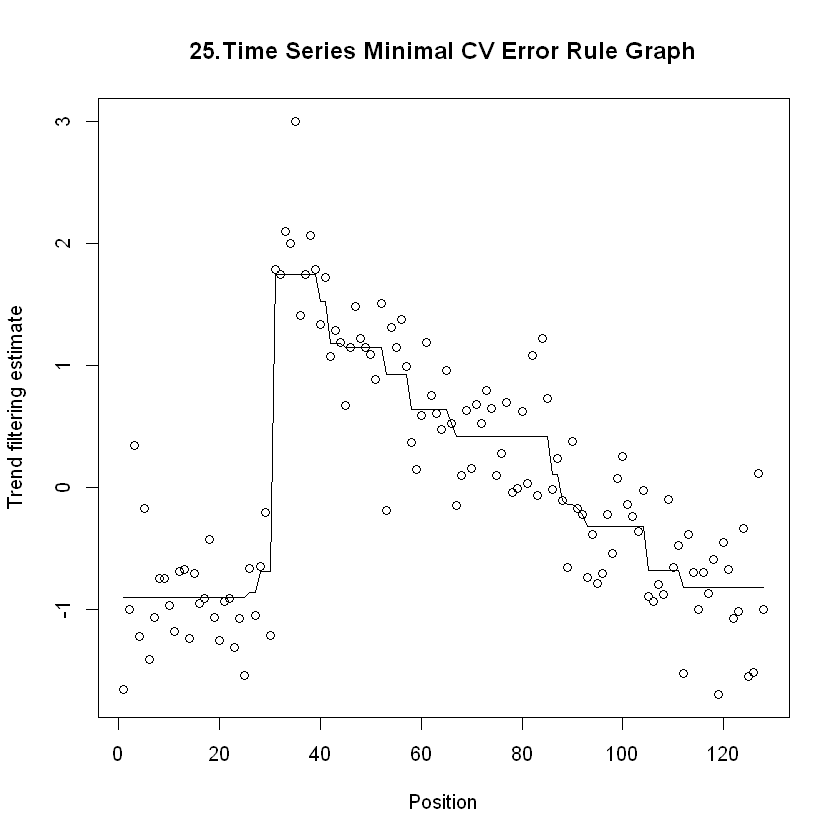

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


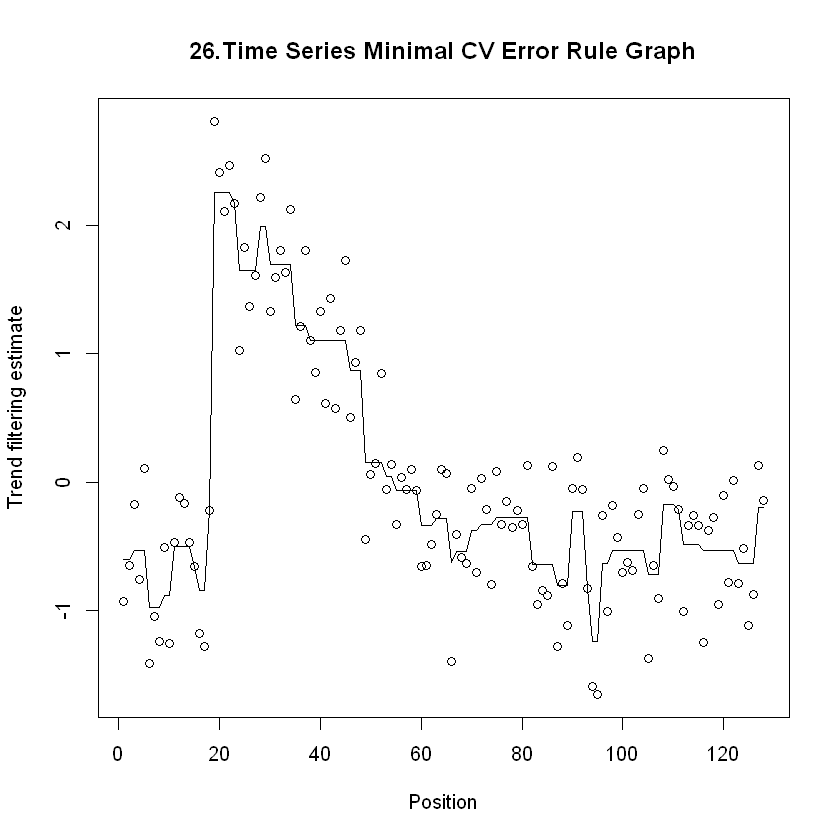

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


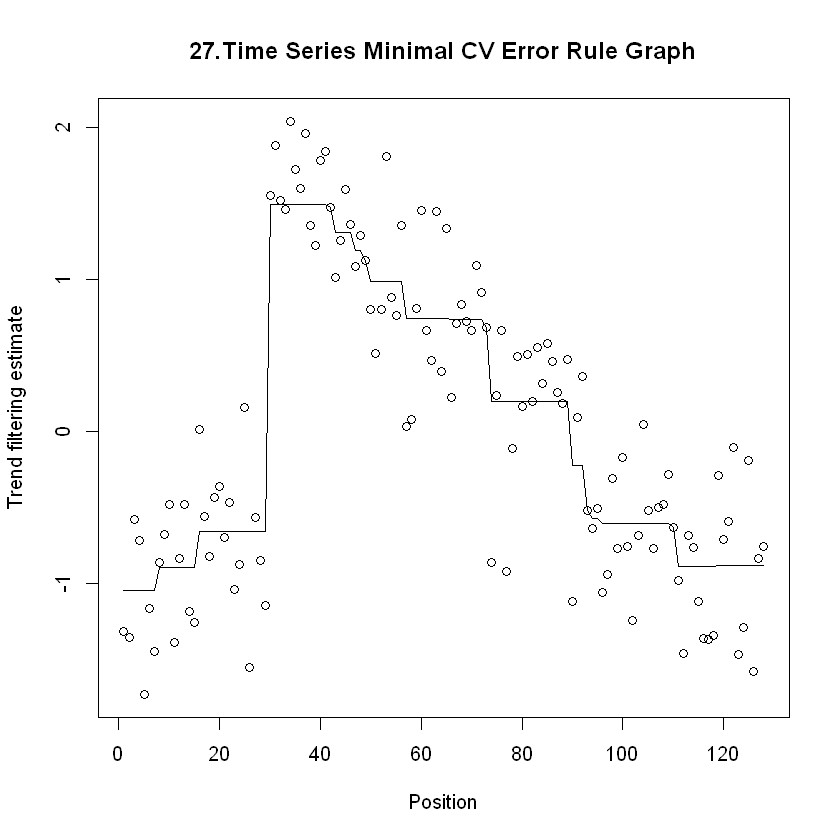

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


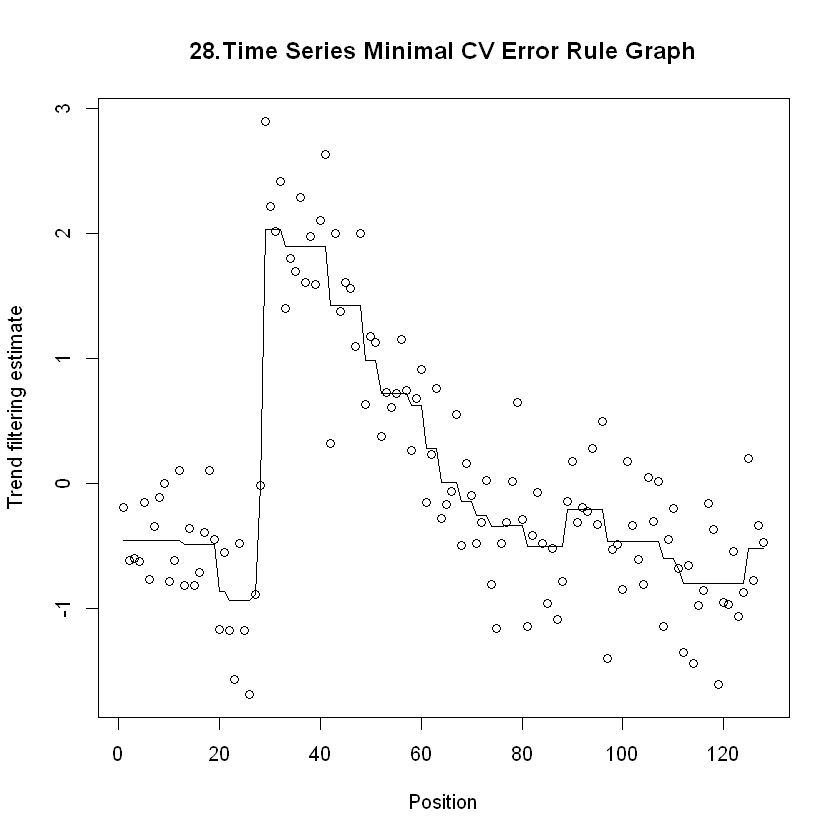

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


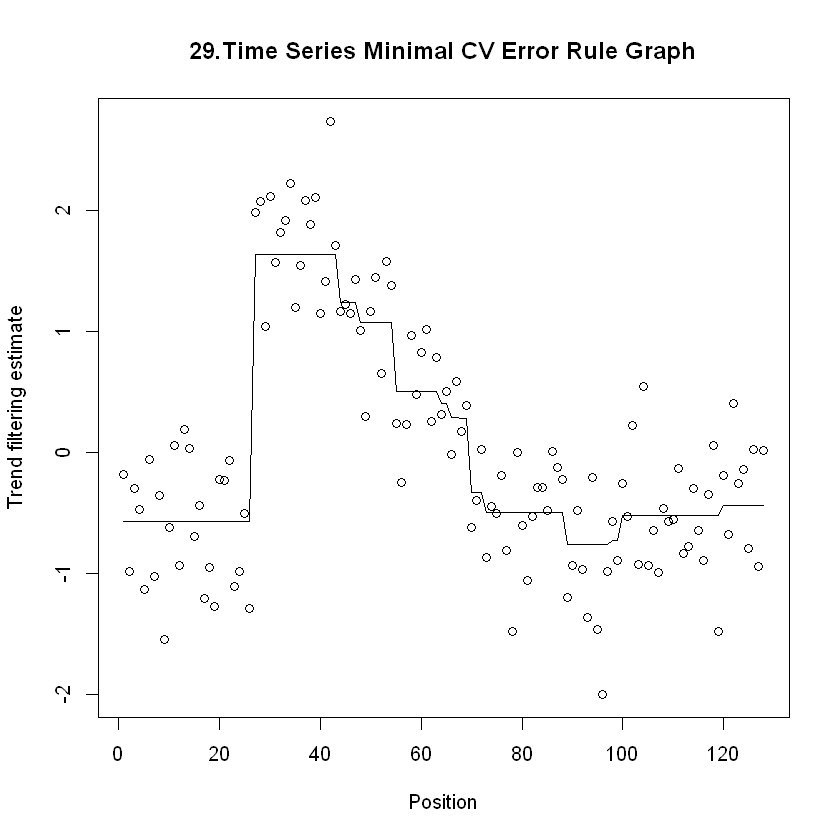

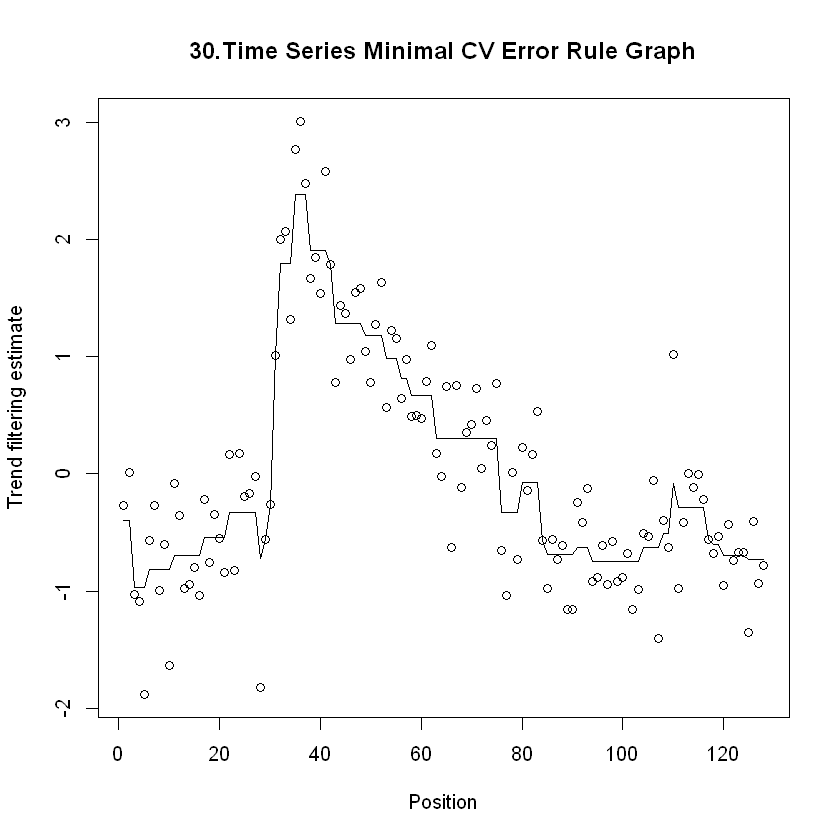

In [23]:
for(i in 1:30){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
   plot(flasso, lambda=cv$lambda.min, main=paste0(i,".Time Series Minimal CV Error Rule Graph"))
  
  
}



## Tree Graphs

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

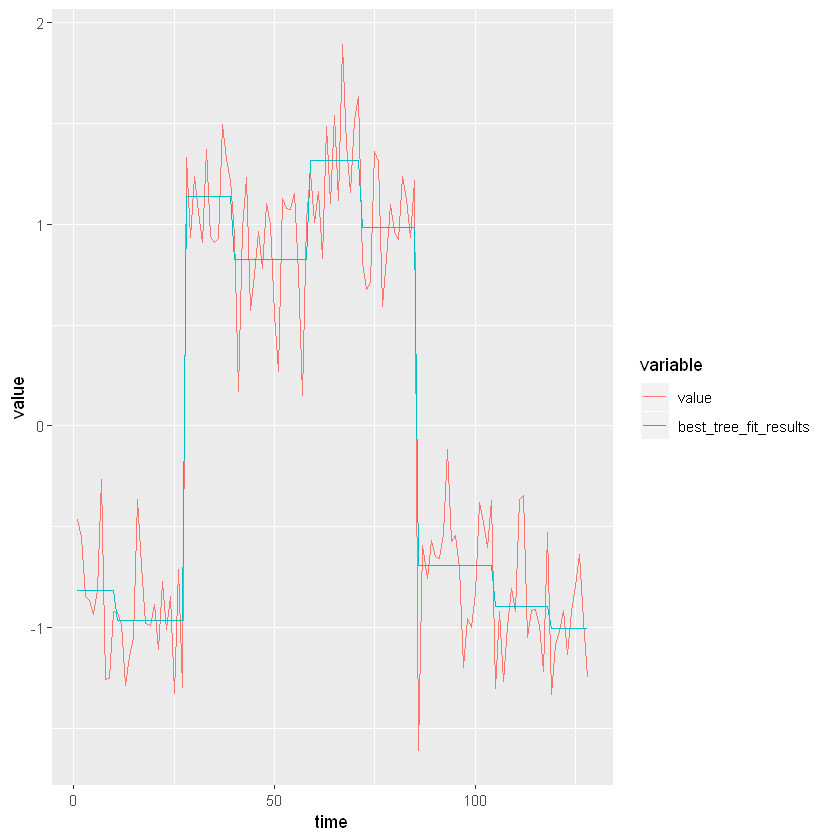

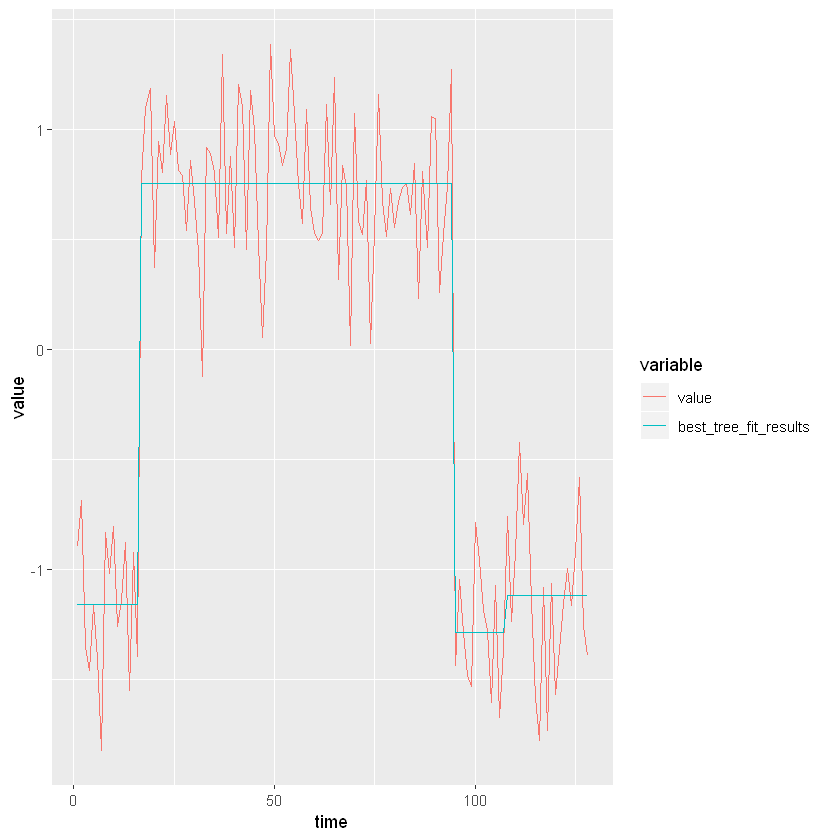

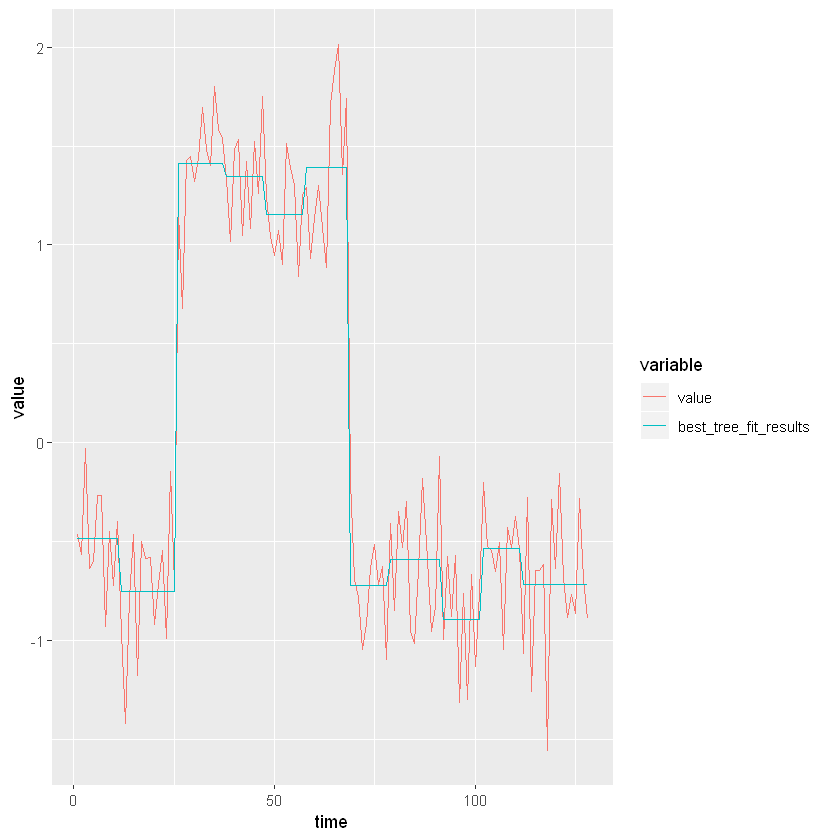

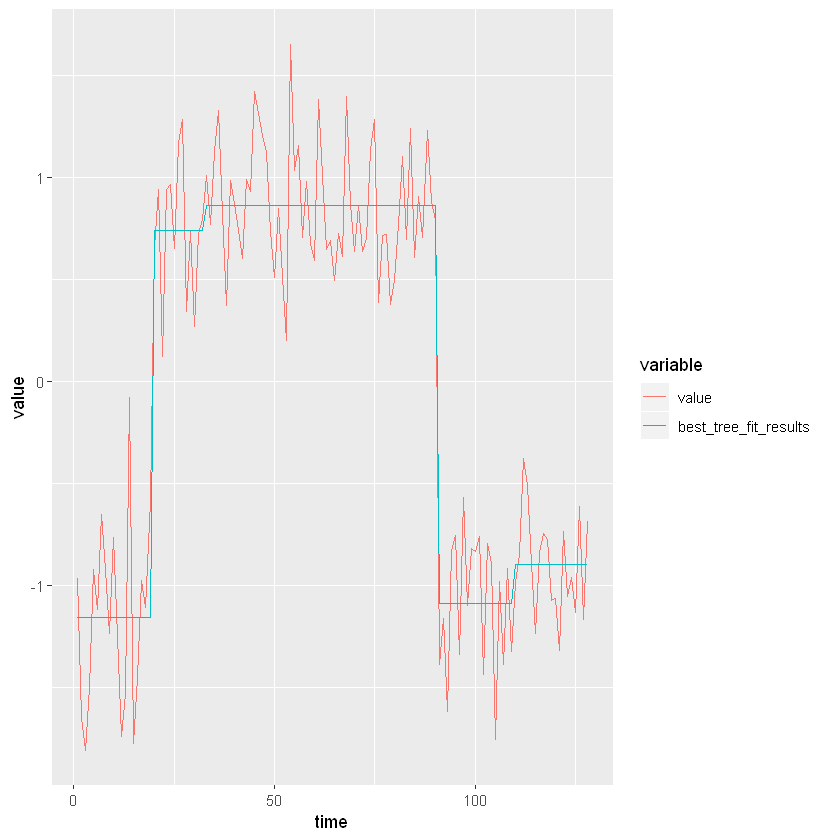

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

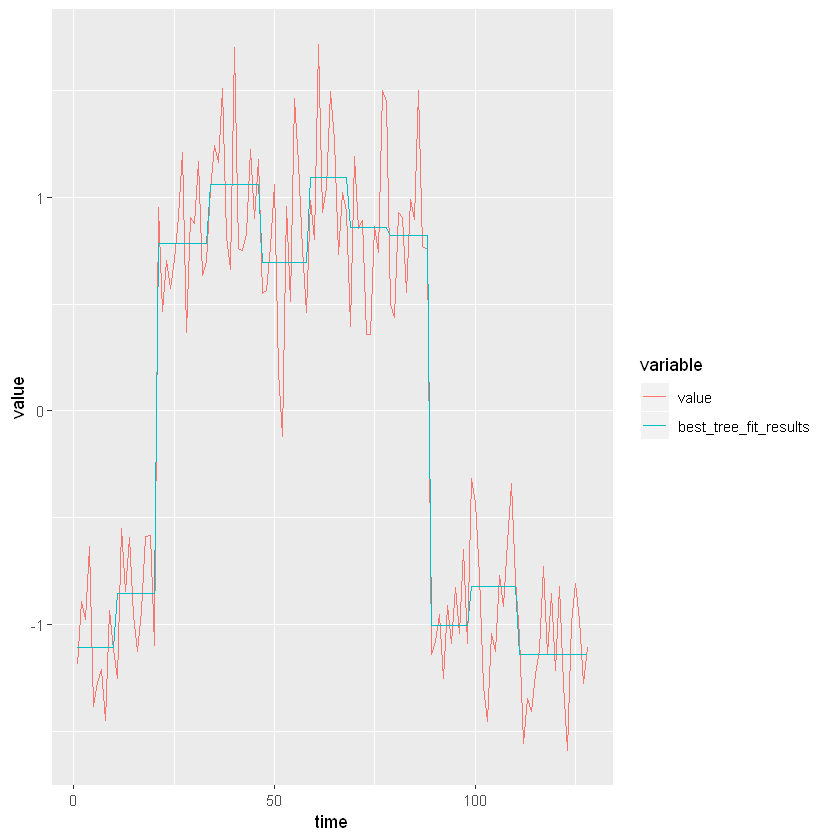

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

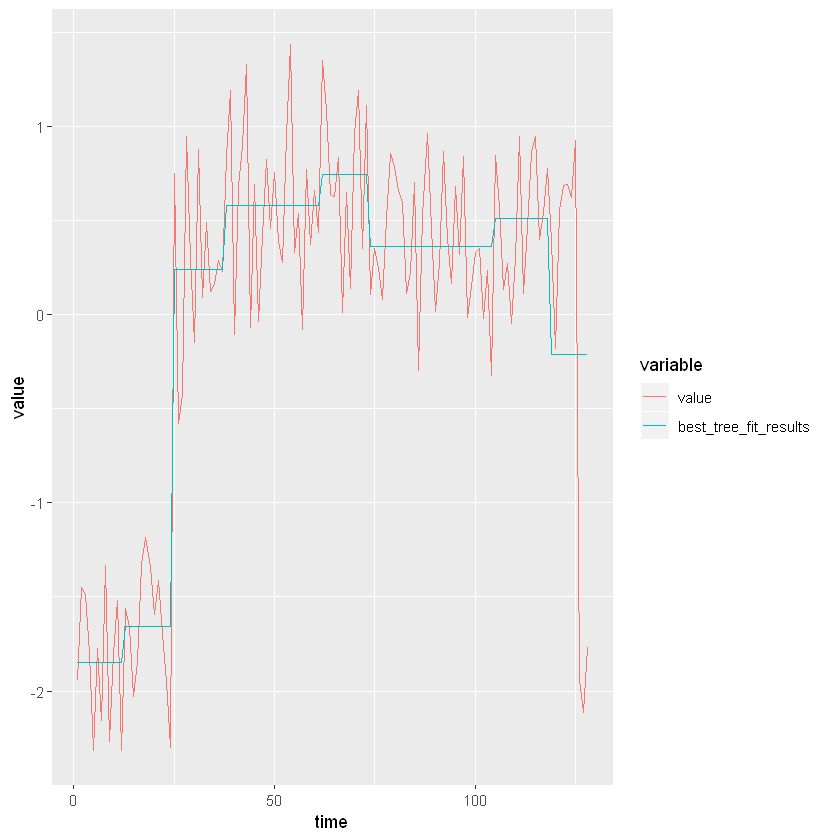

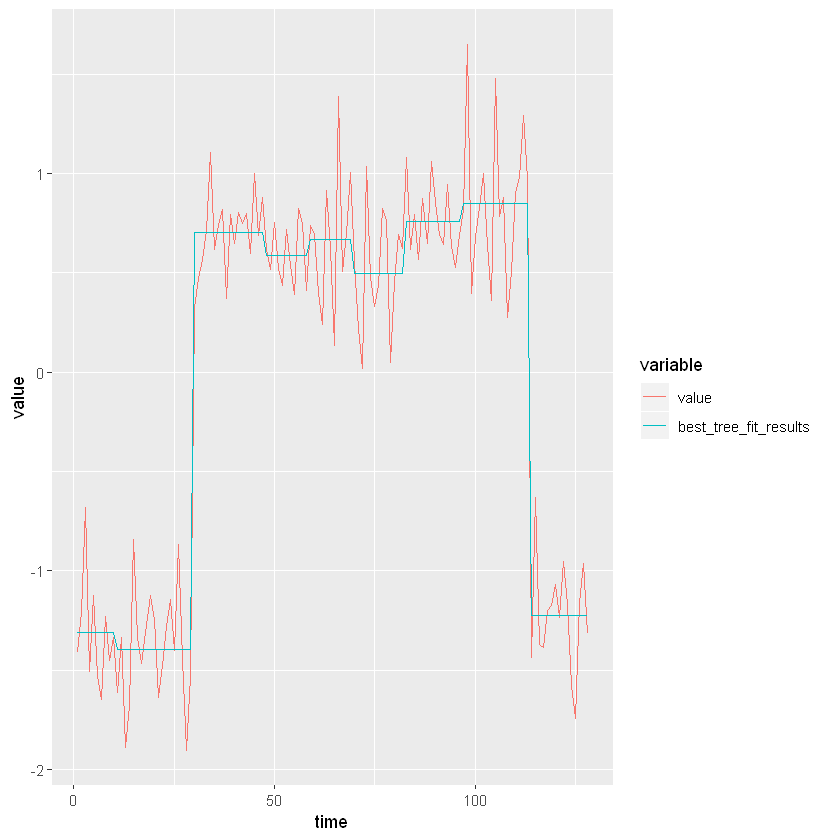

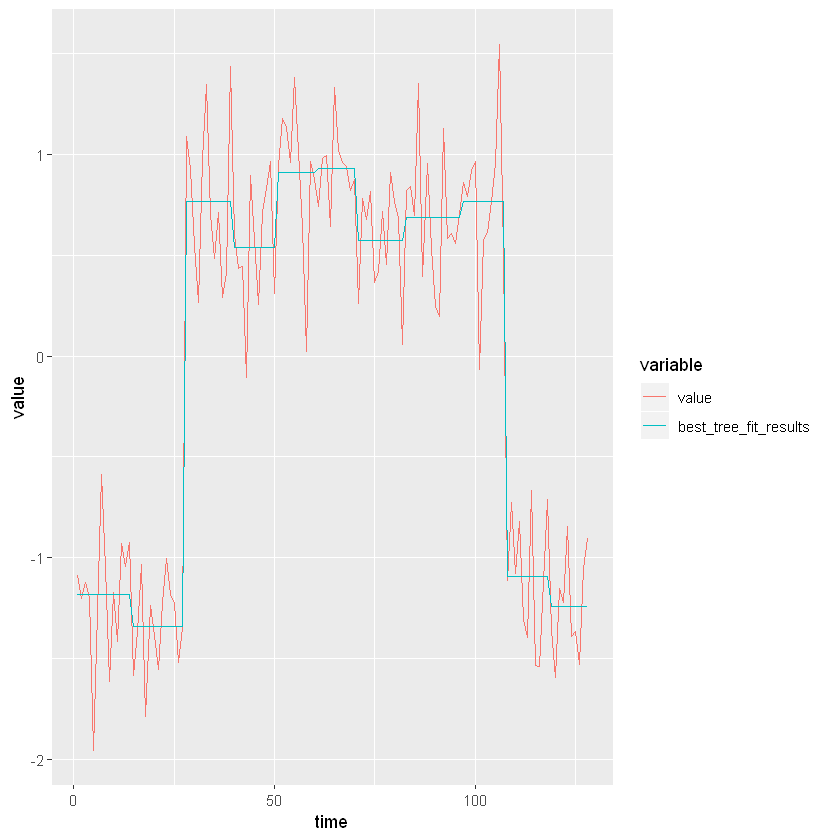

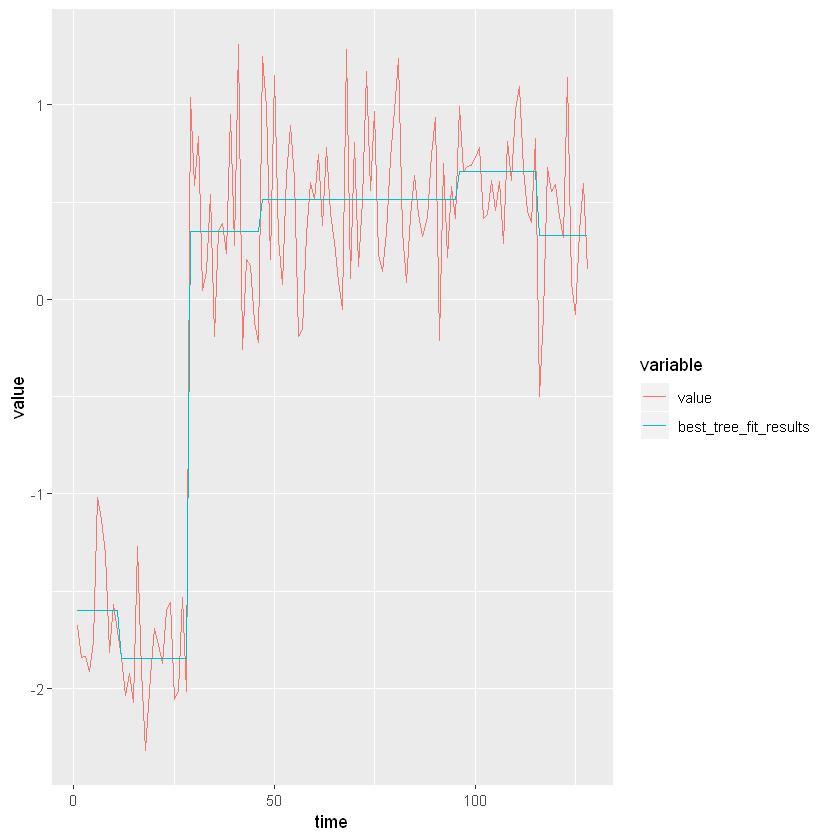

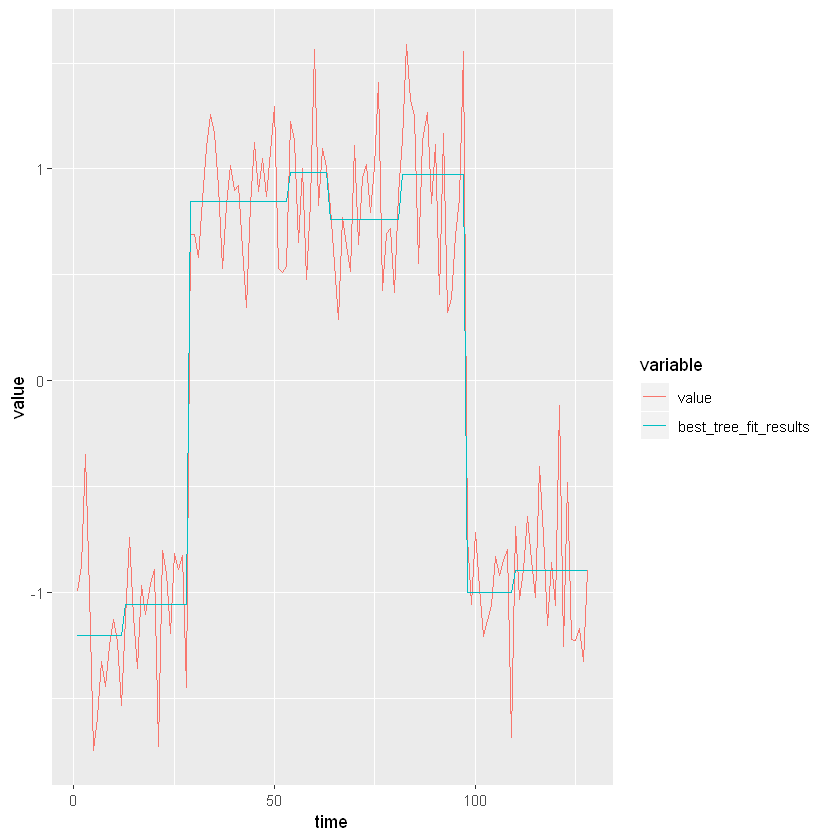

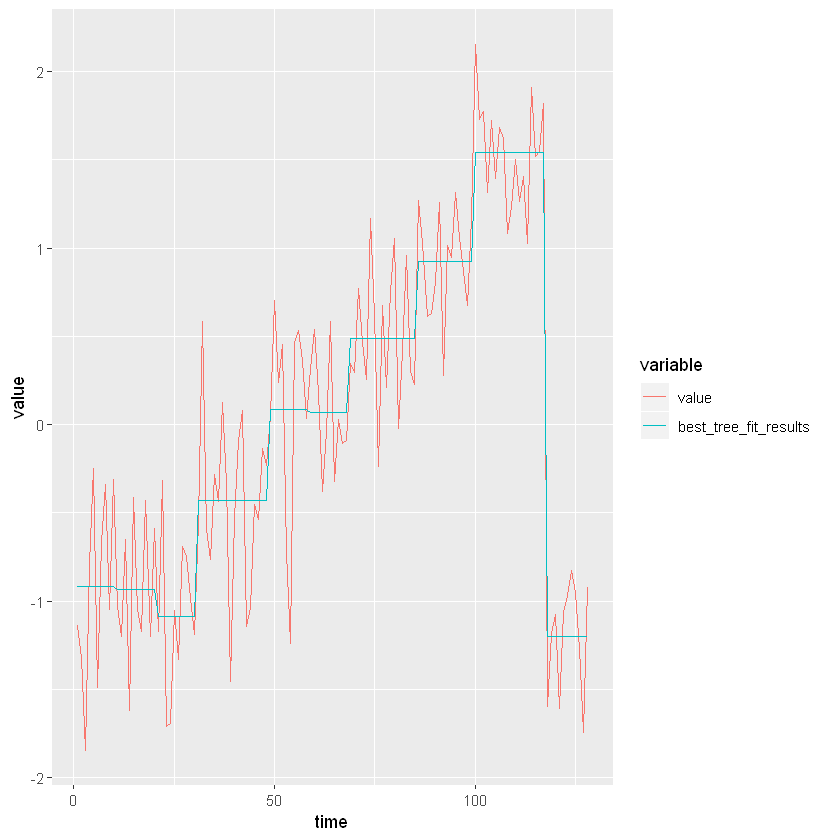

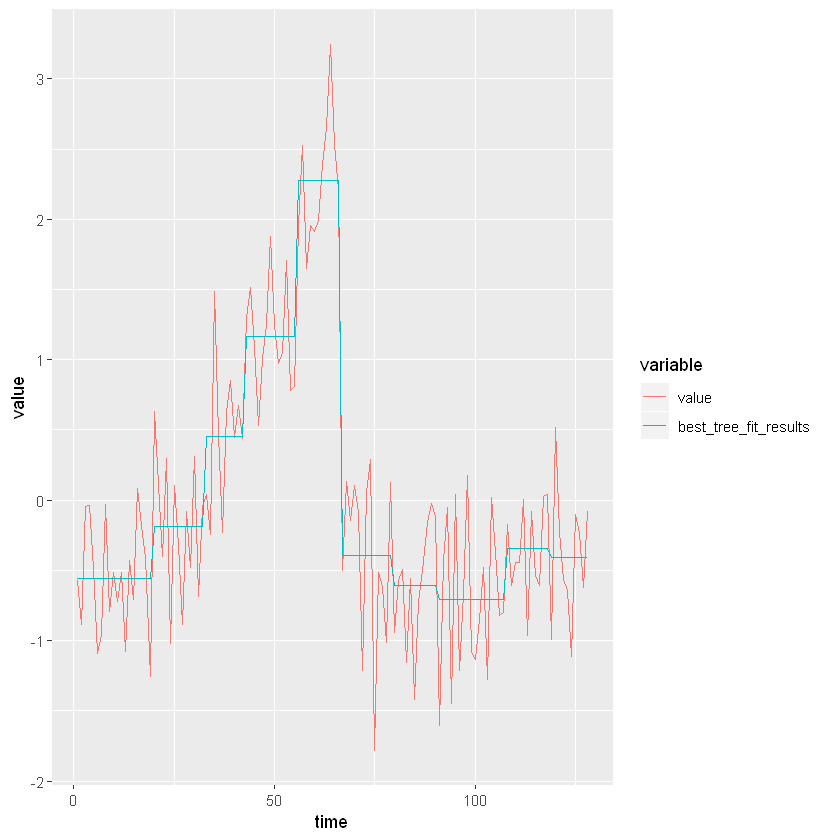

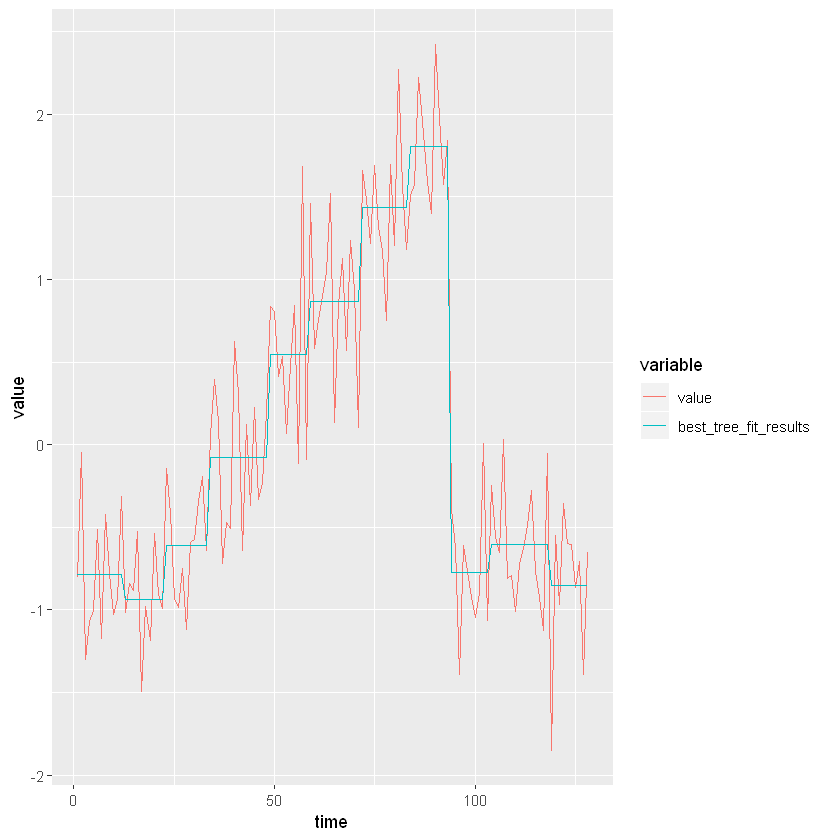

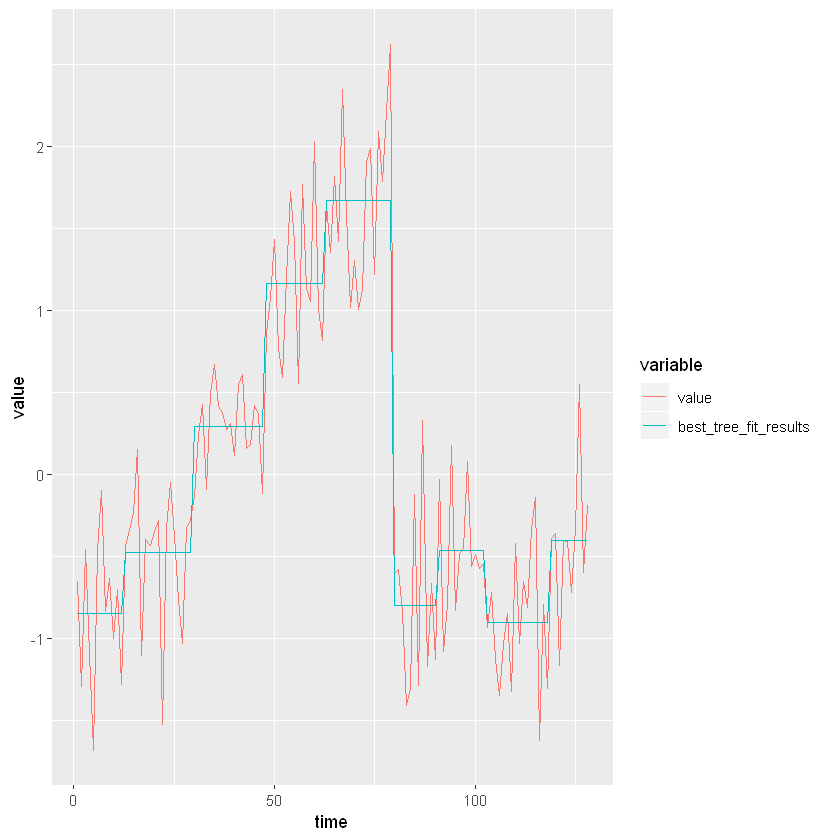

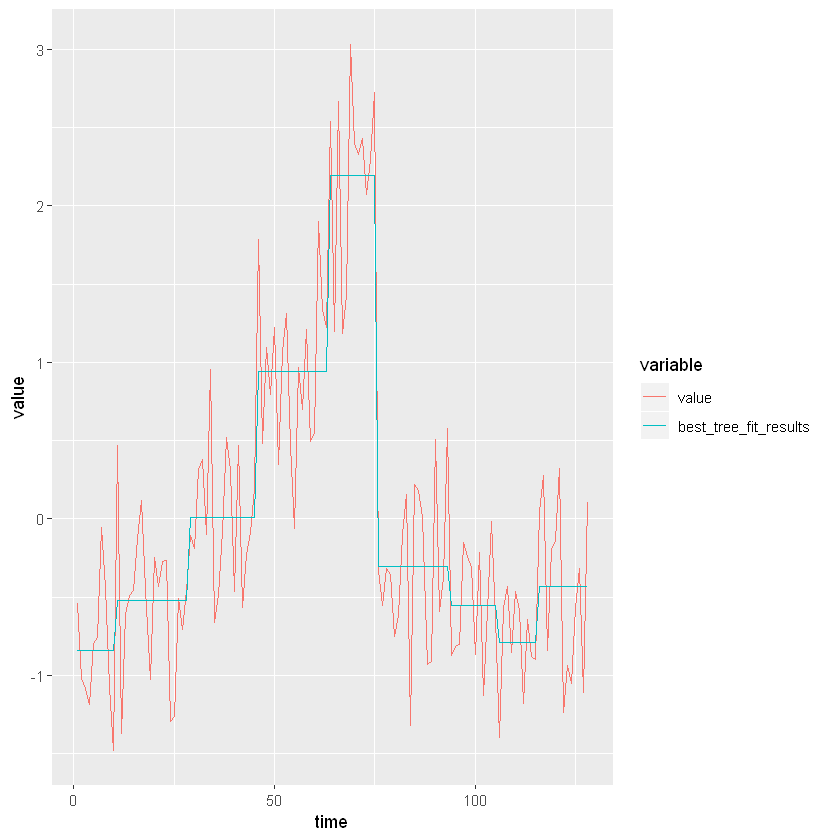

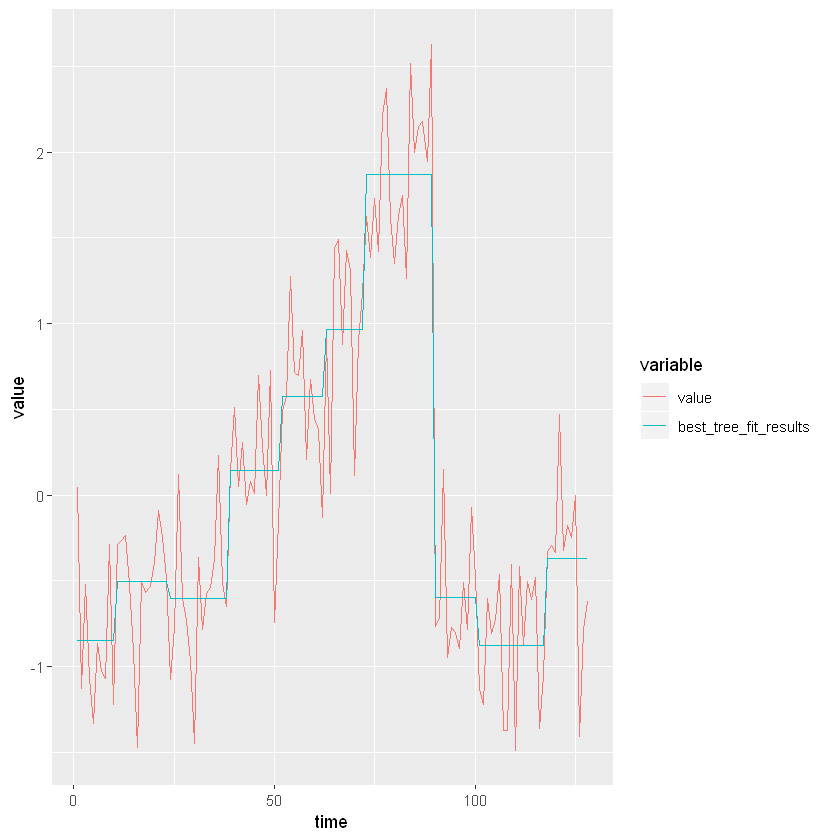

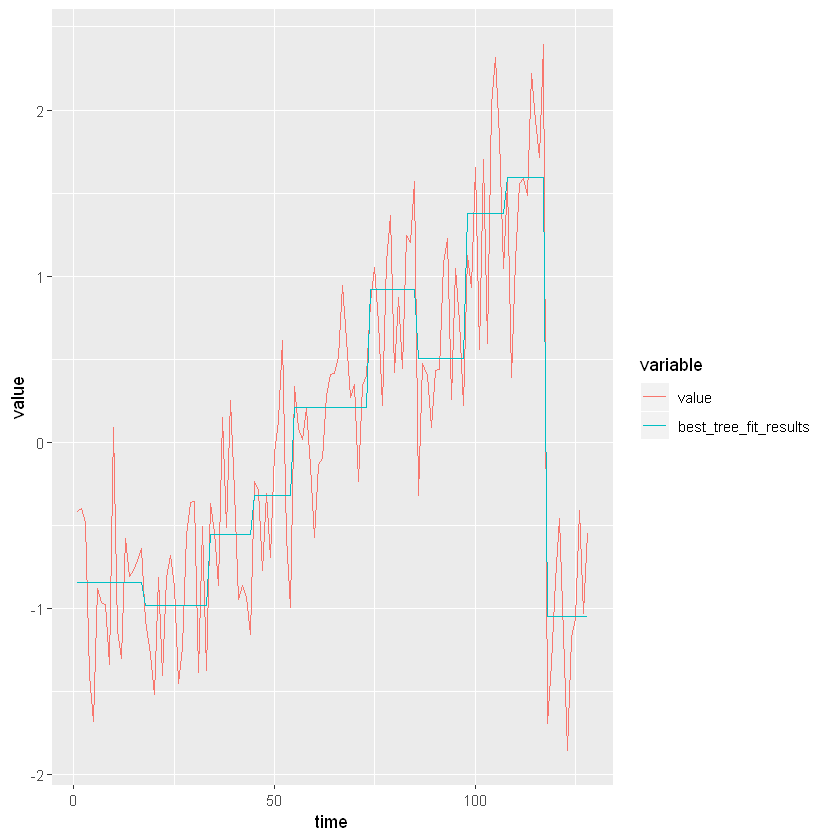

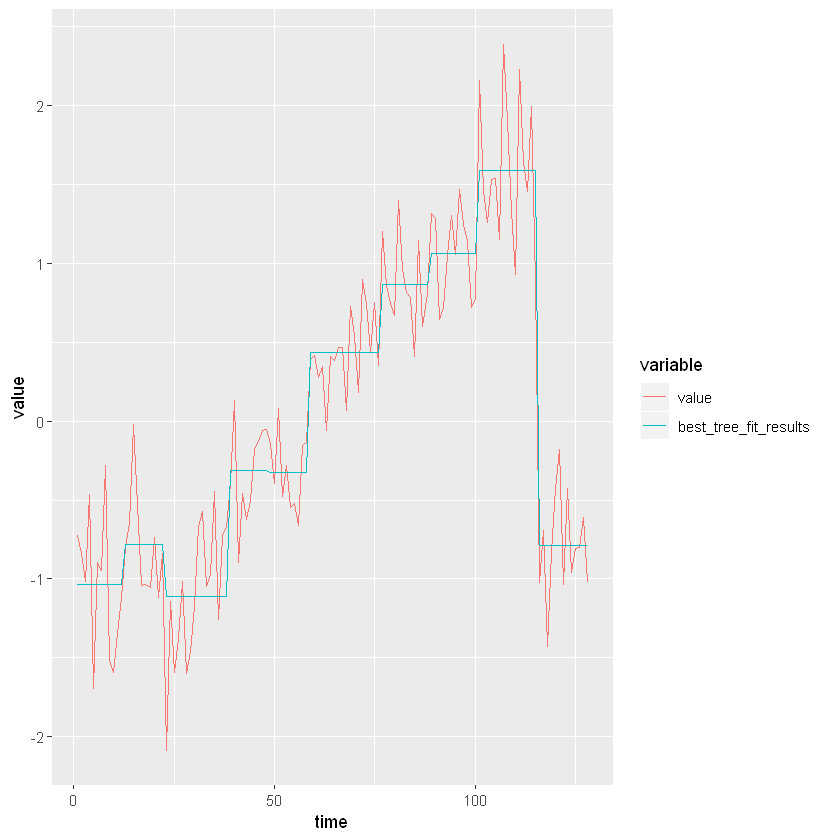

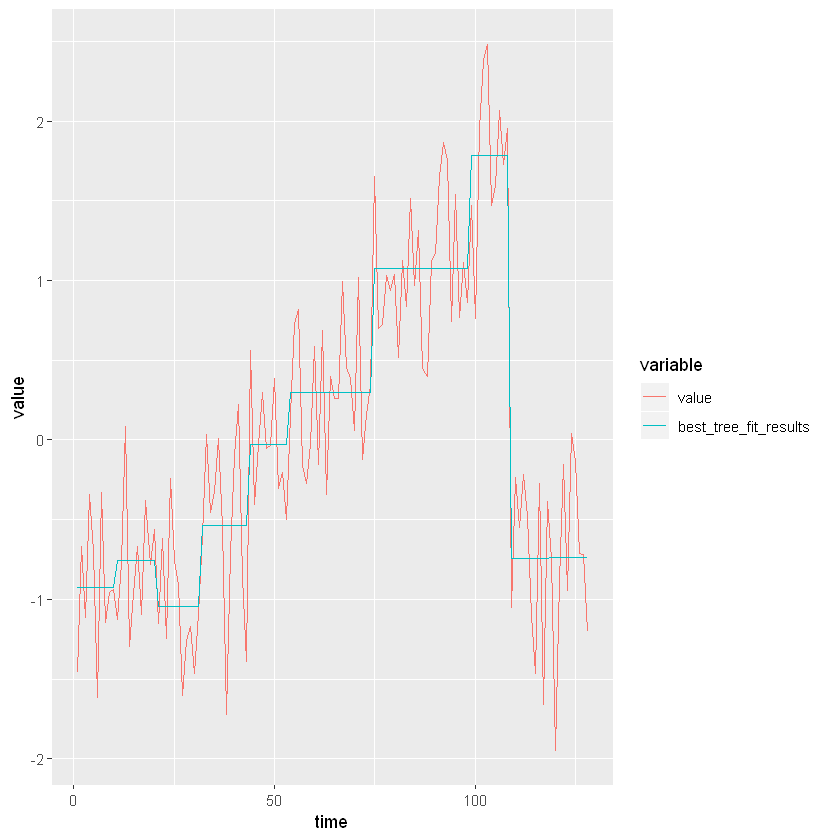

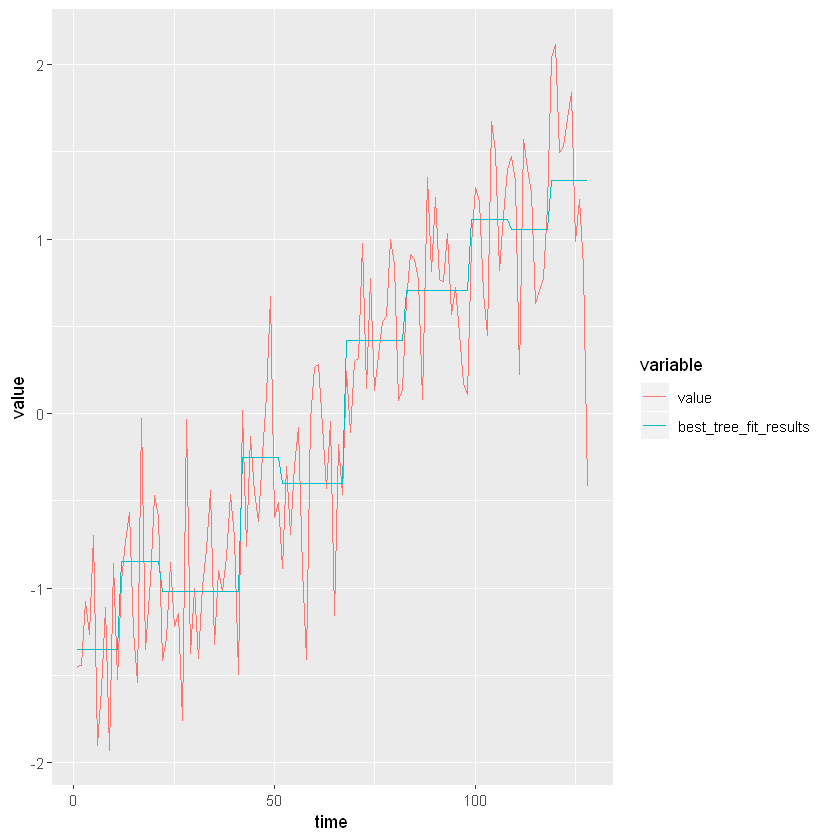

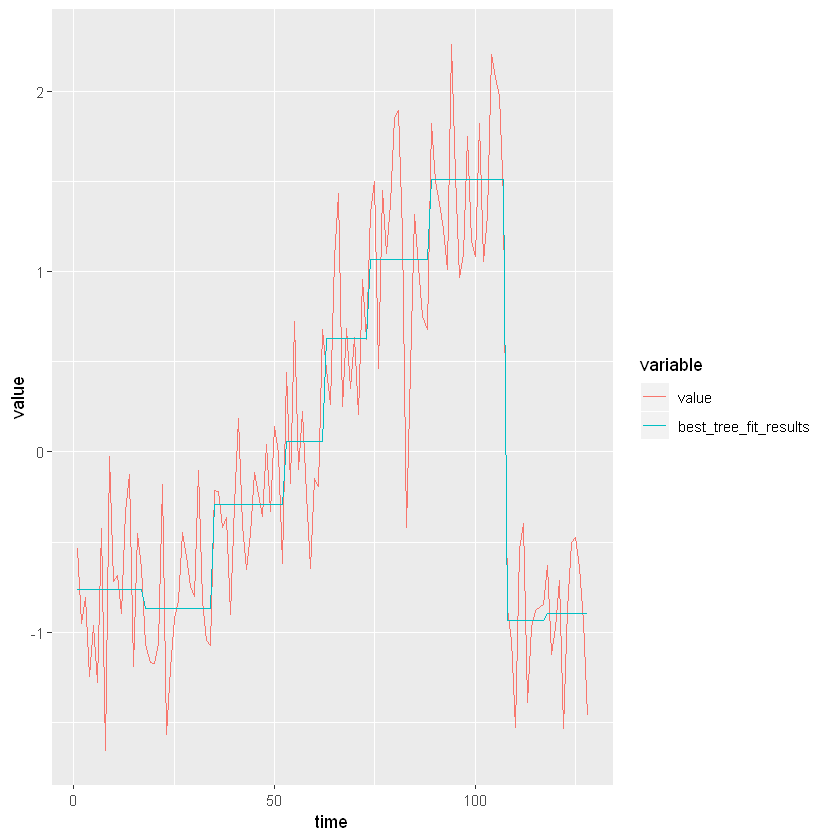

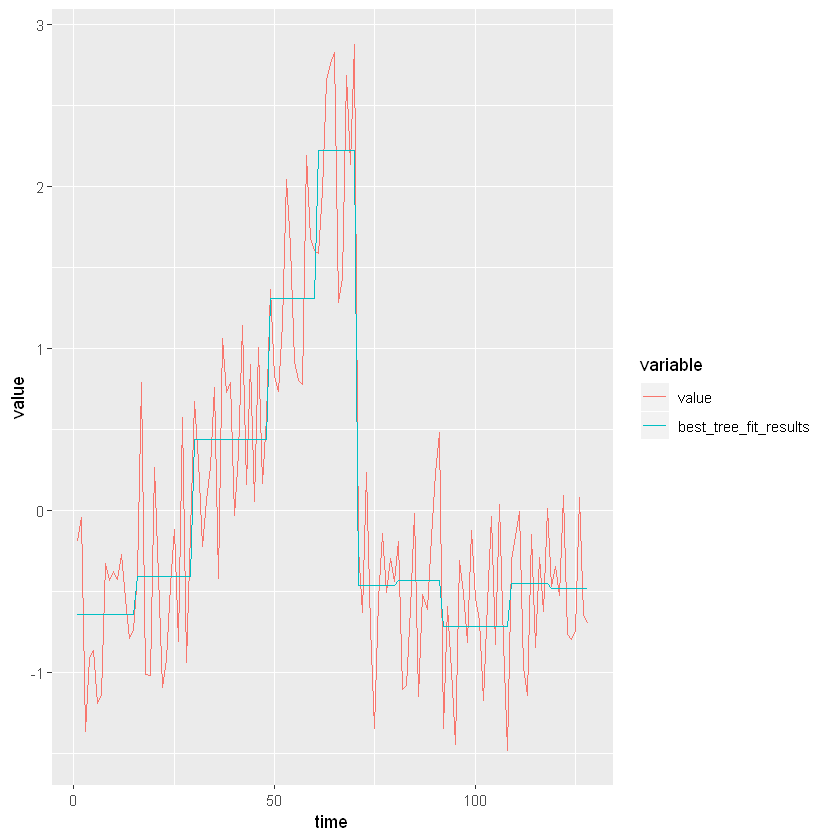

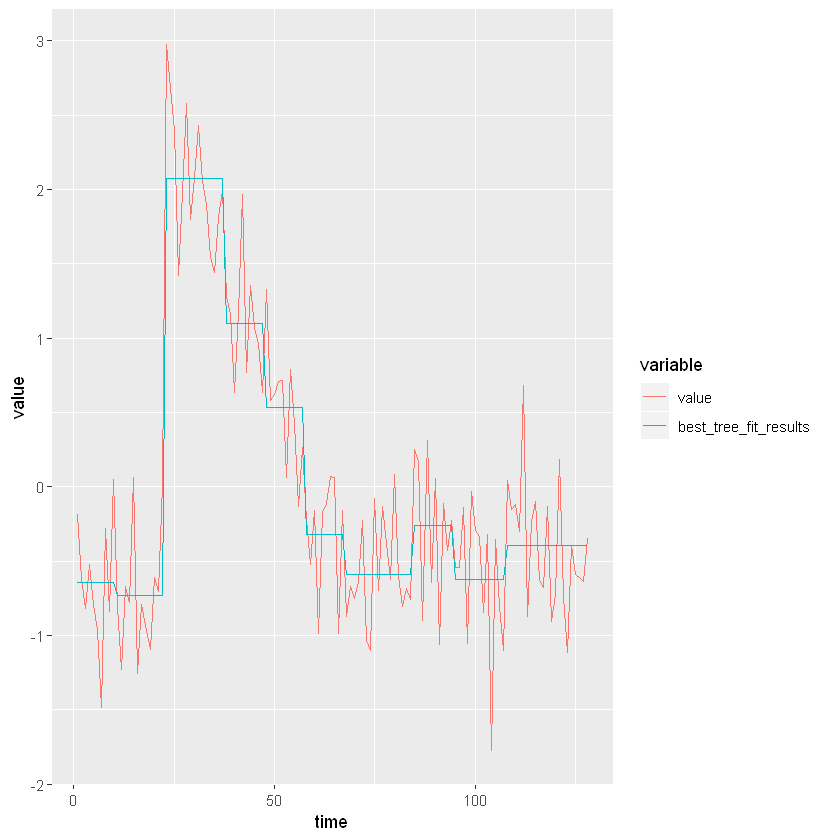

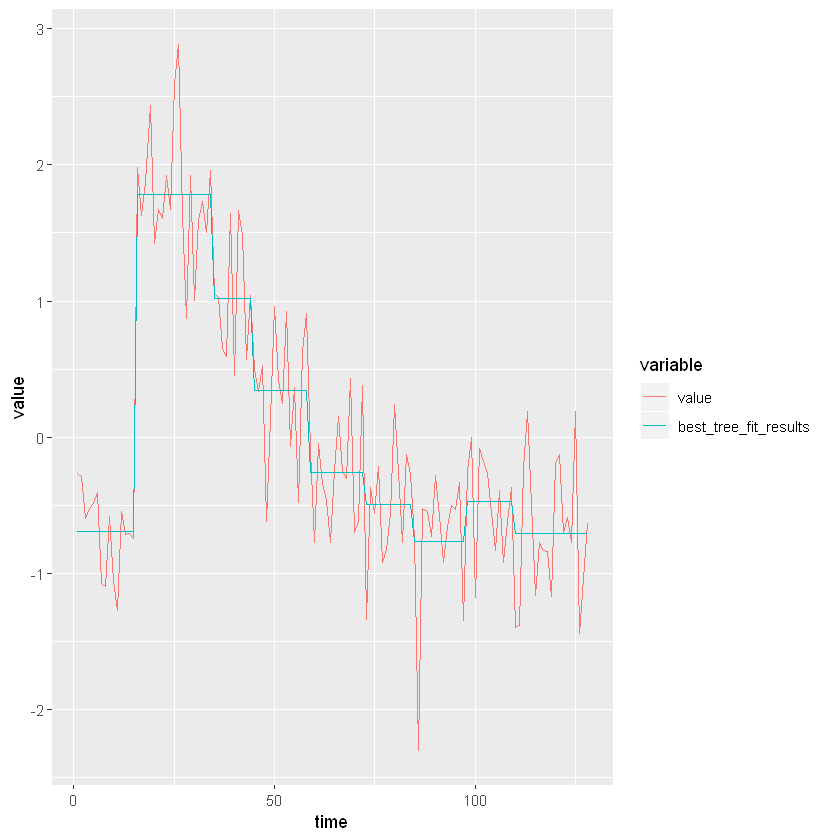

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

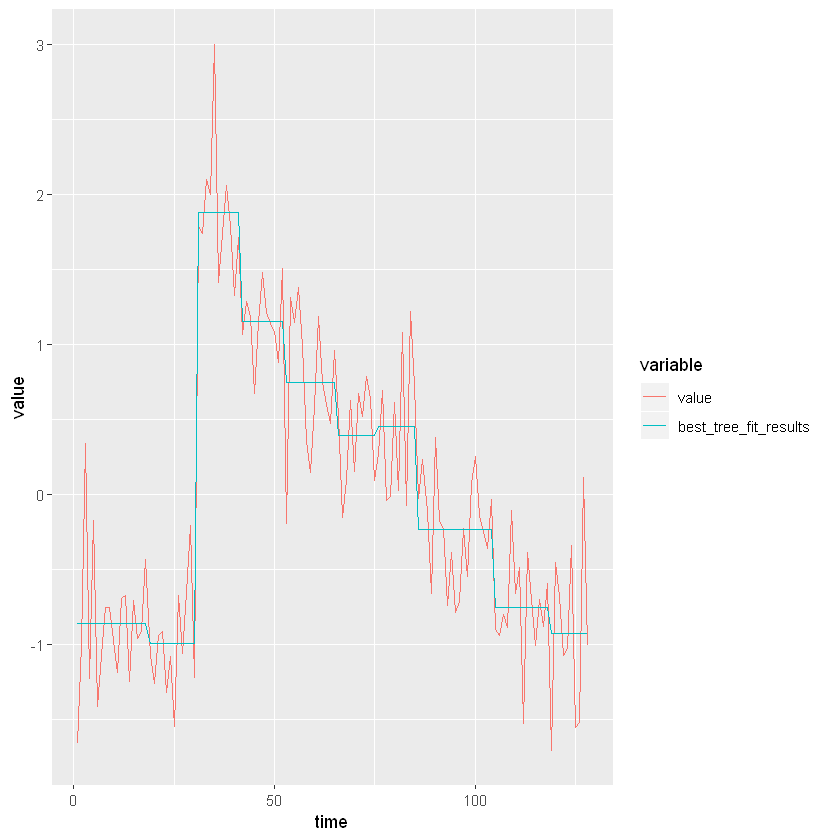

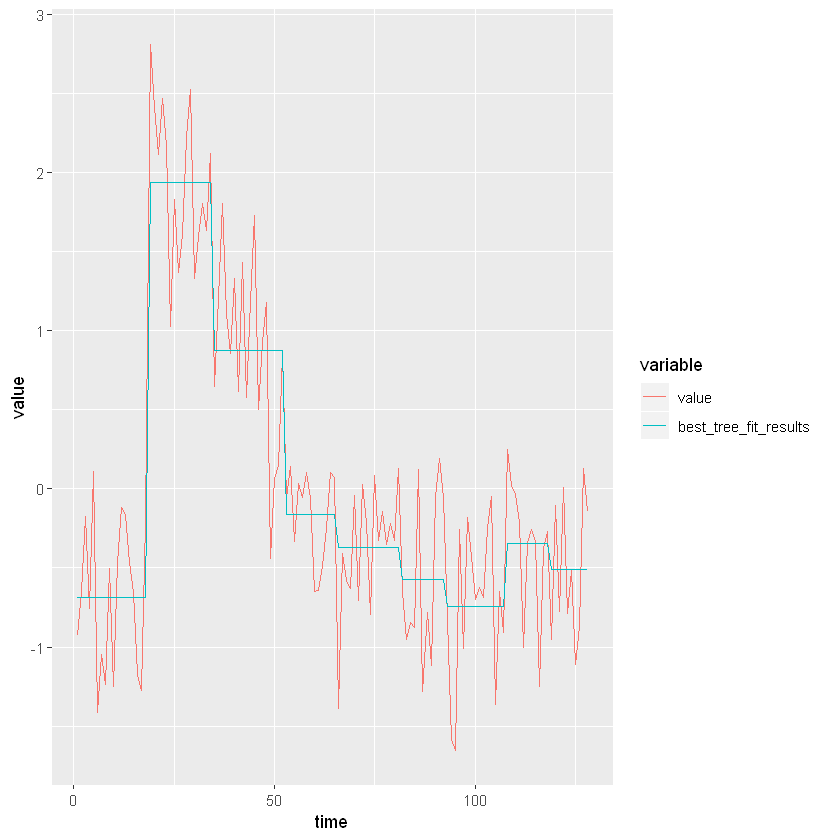

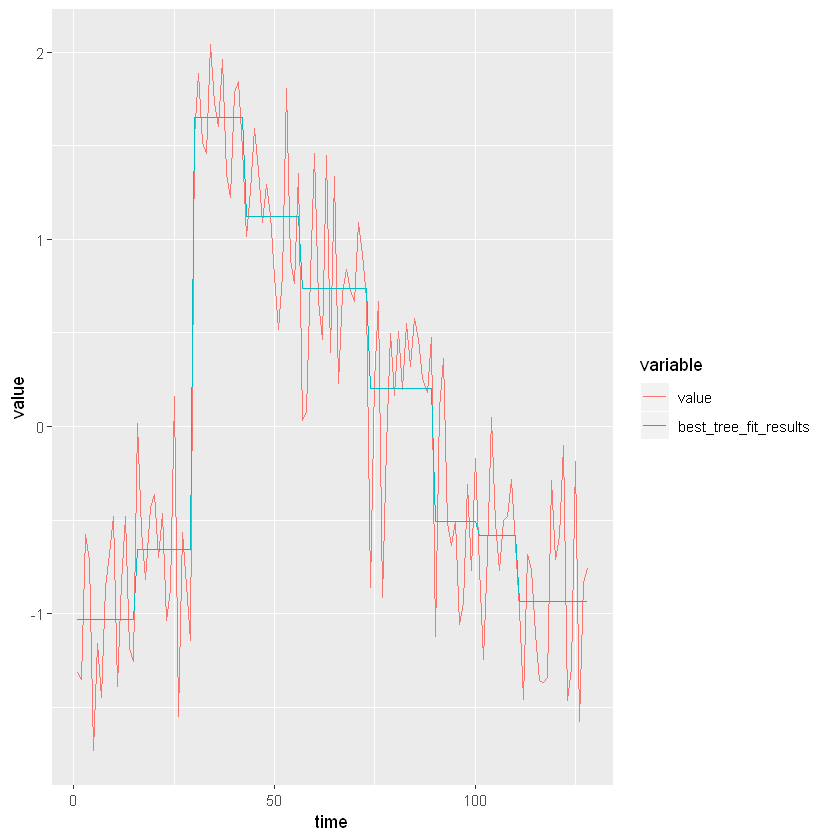

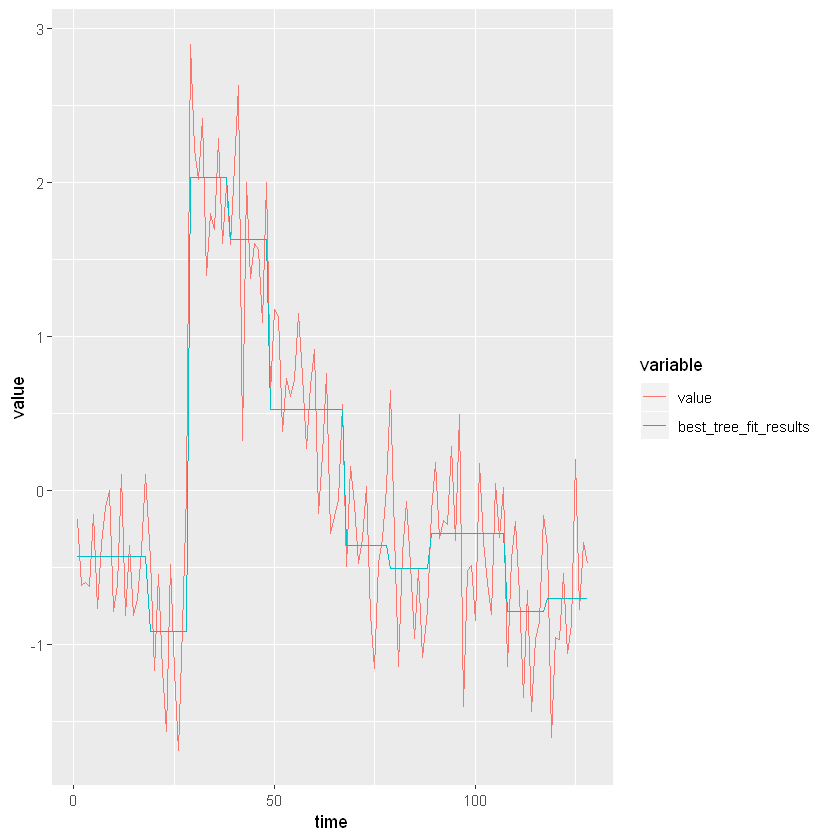

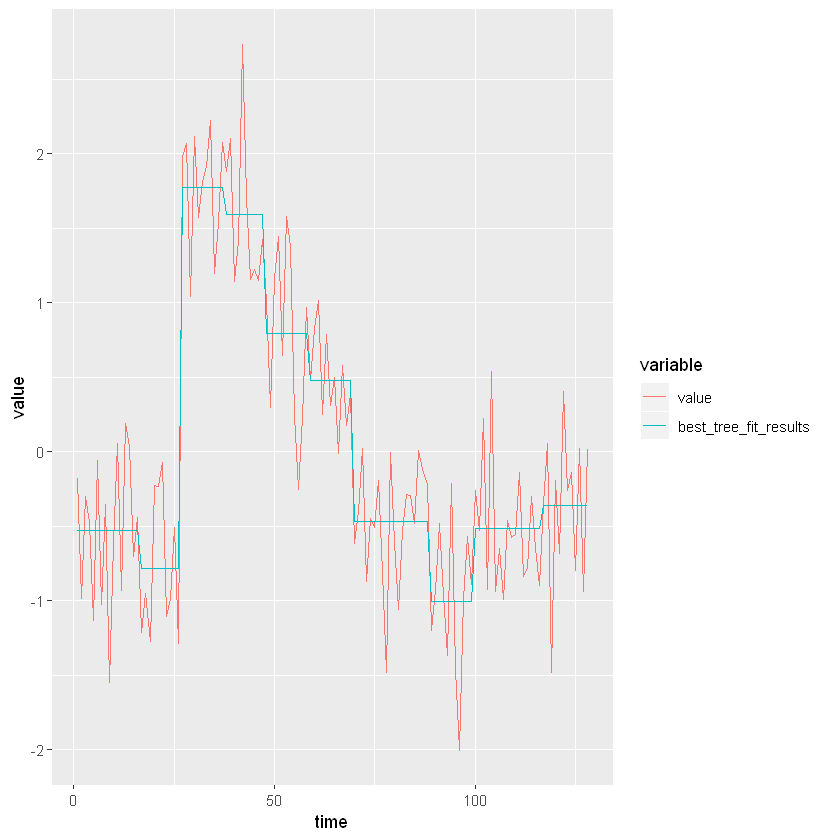

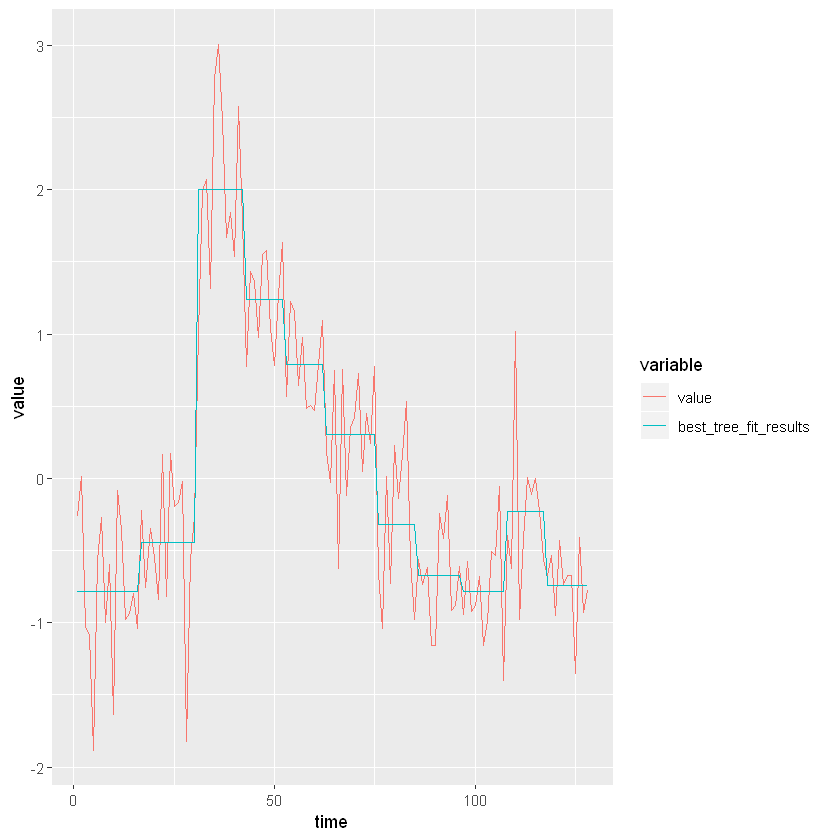

In [23]:
for(j in 1:30){
  
  
  selected_dt <- long_train[id == j]
  
  
  for(i in 1:10){
    
    fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   metric = 'RMSE',
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = i),
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    tree_depths[[i]] <- fit_tree$results
    
}
  
  depth_results = rbindlist(tree_depths)
  depth_results[, max_depth:=seq(1,10)]
  
  
  
  
 
  best_depth <- which.min(depth_results$RMSE)
    
  best_model_fit <-train(value~time, 
                         data= selected_dt,
                         method = "rpart",
                         metric = 'RMSE',
                         control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = best_depth),
                         trControl = ctrl1,
                         tuneGrid = expand.grid(cp = 0), 
  )
  
  

  
  
  
  predicted_dt <-selected_dt[,best_tree_fit_results:=predict(best_model_fit,selected_dt)]
  
  data_plot=melt(predicted_dt,id.vars='time',measure.vars=c('value','best_tree_fit_results'))
  

  print(ggplot(data_plot,aes(x=time,y=value,color=variable))+geom_line())+ggtitle(paste0(j,".Time Series Prediction"))
  
}